# $PetFinder.my\ Adoption\ Prediction$

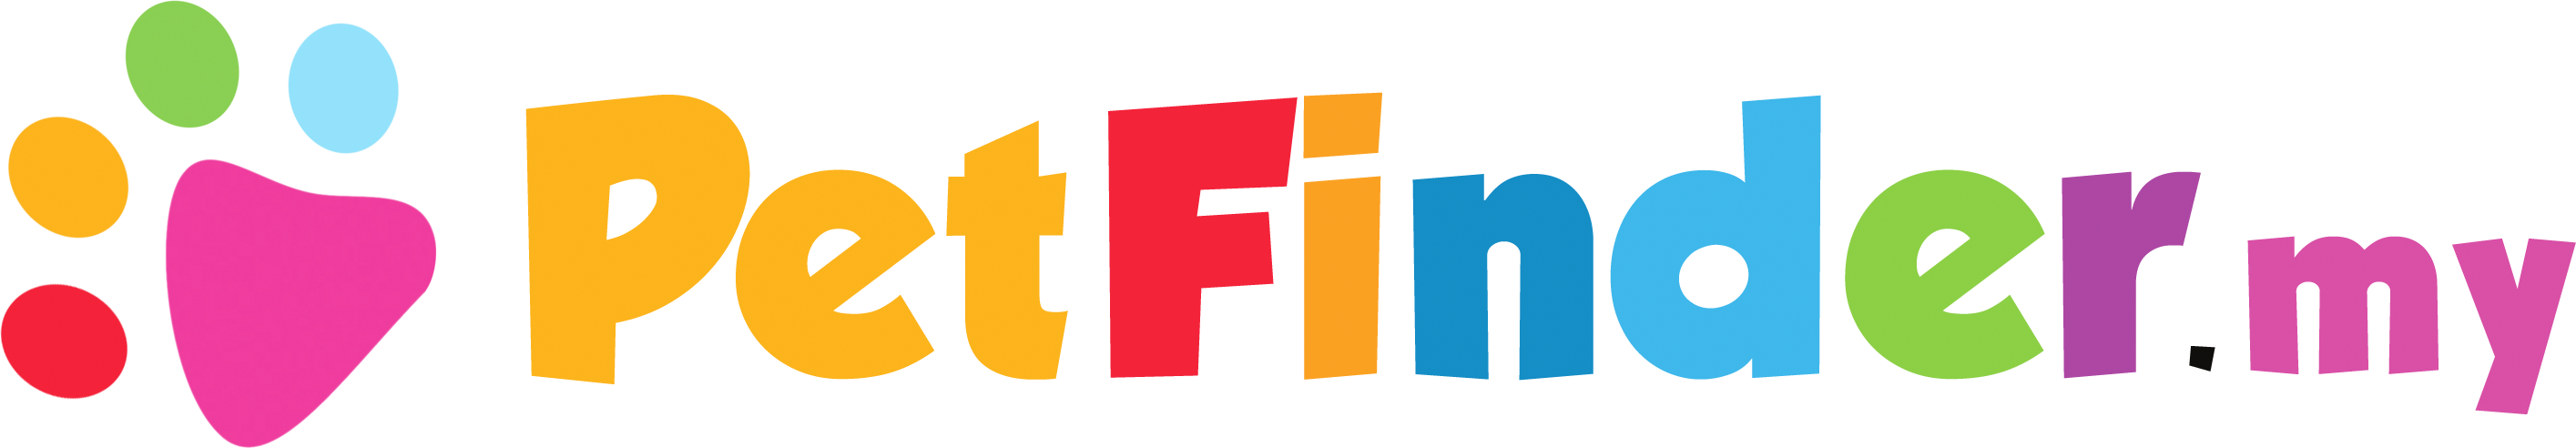

Mounted at /content/drive


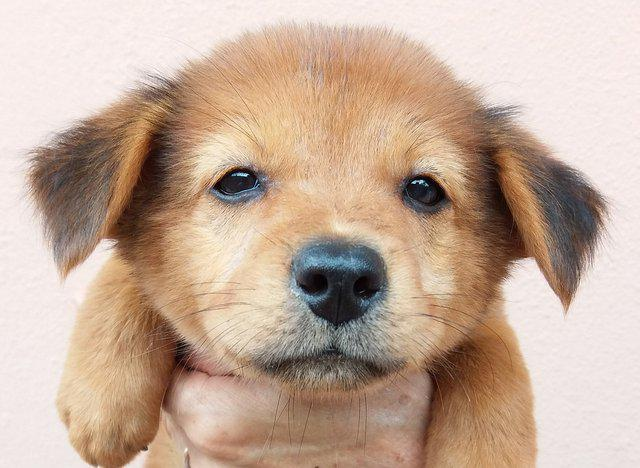

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#@title 
from IPython.display import YouTubeVideo
from IPython.display import Image
# Image("/content/drive/MyDrive/PetFinder.my Adoption Prediction/0ac2e7d16-3.jpg")
Image("/content/drive/MyDrive/PetFinder.my Adoption Prediction/1bc97732e-3.jpg")

# Motivation

Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world.<br>
If homes can be found for them, many precious lives can be saved — and more happy families created.<br>


[PetFinder.my](https://petfinder.my/) has been Malaysia’s leading animal welfare platform since 2008, with a database of more than 150,000 animals.<br> PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare.<br><br>


Animal adoption rates are strongly correlated to the metadata associated with their online profiles, such as descriptive text and photo characteristics. 
In this project we will be developing algorithms to predict the adoptability of pets - specifically, how quickly is a pet adopted? <br>


Developing AI tools for assessing and improving pet adoption performance
will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization.

Example of a smart shelter powered by AI in China:


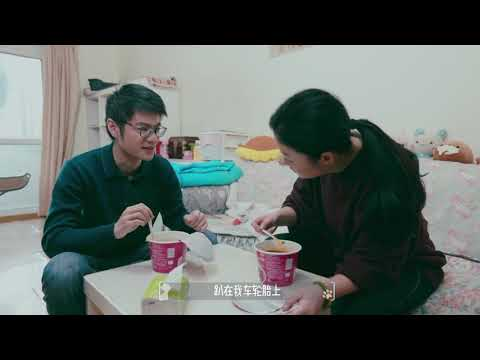

In [2]:
YouTubeVideo('t1HTSQO1mjQ')

# Data

The dataset was taken from Kaggle- https://www.kaggle.com/c/petfinder-adoption-prediction/data?select=train

Our main goal: to predict the speed at which a pet is adopted, based on the pet’s listing on PetFinder (if the profile represents a group of pets, the speed of adoption is determined by the speed at which **all** of the pets are adopted).<br>

 The value of adoption speed is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:

*   0 - Pet was adopted on the same day as it was listed.
*   1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
*   2 - Pet was adopted between 1 and 7 days (1st week) after being listed.
*   3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
*   4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).






# Import Packages & Modules

In [3]:
!pip -q install plotly.express &> /dev/null
!pip -q install "spacy~=3.2" &> /dev/null
!python -m spacy download en_core_web_lg &> /dev/null
!pip3 install scattertext agefromname &> /dev/null
!pip3 install emoji &> /dev/null
# !pip -q install shap &> /dev/null
!pip -q install category_encoders &> /dev/null
!pip3 -q install pandas_profiling --upgrade
!pip -q show pandas-profiling
!pip -q install pyyaml==5.4.1
!pip -q install optuna

     |████████████████████████████████| 261 kB 4.0 MB/s 
     |████████████████████████████████| 102 kB 9.7 MB/s 
     |████████████████████████████████| 3.1 MB 52.8 MB/s 
     |████████████████████████████████| 675 kB 49.2 MB/s 
     |████████████████████████████████| 596 kB 35.8 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 303 kB 48.9 MB/s 
     |████████████████████████████████| 812 kB 54.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |█████████

In [4]:
# General tools
import os
import re
import sys
import sys
!{sys.executable} -m  pip -q install deepchecks -U --quiet
# import itertools
# import more_itertools
# from more_itertools import all_equal
# from typeguard import typechecked
import warnings
warnings.filterwarnings("ignore")

# Main tools
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import sklearn
import glob, json
import seaborn as sns
import matplotlib.pyplot as plt
# import graphviz
# from IPython.display import HTML, display, set_matplotlib_formats
# display(HTML("<style>.container { width:95% !important; }</style>"))
import spacy
import string
import emoji
import unicodedata
from wordcloud import WordCloud, STOPWORDS
import scattertext as st
from scattertext import CorpusFromPandas, produce_scattertext_explorer
%matplotlib inline

# import sort_dataframeby_monthorweek as sd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# For transformations
# from sklearn.preprocessing import MinMaxScaler, normalize, Normalizer, StandardScaler,PowerTransformer,\
#                                   MaxAbsScaler, maxabs_scale, quantile_transform, QuantileTransformer
# from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
# from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, IterativeImputer
# from sklearn.feature_selection import SelectKBest, f_classif, chi2,\
#                                         mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.utils.estimator_checks import check_estimator
import category_encoders as ce

# For modeling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
# # For the tree visualization
# from six import StringIO

# # For scoring and curve fitting
# import phik
# from phik.report import plot_correlation_matrix
# from phik import report
# import shap
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, plot_precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.metrics import pairwise_distances
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.utils.fixes import loguniform
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.utils import class_weight

# For validation
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from deepchecks.suites import full_suite
from deepchecks import Dataset
from deepchecks.suites import single_dataset_integrity
from deepchecks.suites import single_dataset_integrity
from deepchecks.checks.performance import ConfusionMatrixReport

# For ensembling
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier,\
                                GradientBoostingClassifier, RandomForestClassifier
# For clustering and noise
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# profiling
import pandas_profiling

     |████████████████████████████████| 216 kB 3.2 MB/s 
     |████████████████████████████████| 9.8 MB 36.0 MB/s 


# Exploratory Data Analysis

In this section, we analyzed each feature and considered whether it correlated with the target (or to other features in the dataset).<br>
The main puropse is to learn thoroughly every feature and how it will be engineered , if at all.

## Utility Functions

### Data wrangling Functions

In [5]:
# load dataset
def load_data(): 
    train = pd.read_csv('/content/drive/MyDrive/PetFinder.my Adoption Prediction/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/PetFinder.my Adoption Prediction/test.csv')
    return train, test


# normalize pets' age 
def new_age(df):
    nage = 0
    if df['Type'] == 1:
        nage = df['Age'] / 144  # Dog Avergae Life Span - 12 years
    else:
        nage = df['Age'] / 180  # Cat Average Span - 15 years
    return nage

# differntiate between single / multiple pet.s
def new_Quantity(df): 
    nquantity = 0
    if df['Quantity'] == 1:
        nquantity =  0
    else:
        nquantity =  1 
    return nquantity

# drop unwanted columns
def cols_dropper(df, cols_to_drop=[]):
    all_cols = df.columns
    drop_list = []
    for col in cols_to_drop:
        if col in all_cols:
            print(f"{col} was dropped")
            drop_list.append(col)
    df.drop(columns=drop_list, axis=1,inplace = True)
    print(df.columns)


# generate one-hot encoding values
# def get_dummies(df,col): 
#    dummies = pd.get_dummies(df, columns=[col])  
#    df = pd.merge(df, dummies)
#    df.drop(columns= col, axis=1, inplace =True)
#    return df

# replace unknown variables with the answer no
def replace_unknown(df, col):
  d = {2: 0, 3: 0, 1: 1}
  df[col] = df[col].map(d)
  return df[col]

# fix breed columns 
def new_breed(df): 
    Breed1_new = df['Breed1']
    Breed2_new = df['Breed2']

    if df['Breed1'] == df['Breed2']: 
      Breed2_new = 0
    elif (df['Breed1'] == 0) & (df['Breed2'] !=0): 
      temp = Breed2_new
      Breed2_new = Breed1_new
      Breed1_new = temp
    elif (df['Breed1'] != 307) & (df['Breed2'] == 307):
        Breed1_new = 307
        Breed2_new = 0
    return Breed1_new, Breed2_new


# generate 2-values encoded categorical feature
def cocncat_2cols(df, col1, col2): 
  series = df[col1].astype(str) + '_' + df[col2].astype(str)
  # df.drop(['col1', 'col2'], axis=1, inplace =True)
  return series


# generate 3-values encoded categorical feature
def cocncat_3cols(df, col1, col2, col3): 
  series = df[col1].astype(str) + '_' + df[col2].astype(str) + '_' + df[col3].astype(str)
  # df.drop(['col1', 'col2','col3'], axis=1, inplace =True)
  return series


# generate 5-values encoded categorical feature
def cocncat_5cols(df, col1, col2, col3, col4, col5): 
  series= df[col1].astype(str) + df[col2].astype(str) + \
                              df[col3].astype(str) + '_' + \
                              df[col4].astype(str) + '_' + df[col5].astype(str)
  # df.drop(['col1', 'col2','col3'.'col4','col5'], axis=1, inplace =True)
  return series

# This function generates a a new scale for unique values, not sure if we'll use use it
# def factorize(df,col): # Breed_full, Color_full, state 
#   series,_ = pd.factorize(df[col])
#   return series


# generate mean-encoded target feature
def mean_encode(df, col, target): 
  mean_encode = df.groupby(col)[target].mean()
  #print(mean_encode)
  df.loc[:, col + '_''encode'] = df[col].map(mean_encode)
  return df


# data inspection
def data_overviewer(df): 
    print("Discribe function output:")
    display(df[df.select_dtypes(exclude='object').columns].describe().T.\
            style.background_gradient(axis=0,cmap='Blues'))
    print(50 * ".","\n")
    print("Input function output:")
    print(df.info())
    print(50 * ".","\n")
    print("Duplicated analysis:")
    print(f"{df.duplicated().sum()} dup values in the data")
    print(50 * ".","\n")
    print("Number of unique values in the data:")
    for i in df.columns.to_list():
      print(f'\n{i}:{df[i].nunique()}')
    print(50 * ".","\n")
    print("Shape of the data:")
    print(f'\ndata df with {df.shape[0]} rows and {df.shape[1]} columns')


# plot countplot
def plot_countplot(col, title, data, xticklabels=None, hue=None, palette=None):
    plt.figure(figsize=(15, 8))
    if hue:
        g = sns.countplot(x=col, hue=hue, data=data ,palette=palette)
    else:
        g = sns.countplot(data[col])
    g.set_title(title)
    for p in g.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        g.annotate('{:.2g}%'.format(100.*y/len(data[col])), (x.mean(), y), ha='center', va='bottom')
    if xticklabels:
        g = g.set_xticklabels(xticklabels)


# check if cross breed
def is_cross_breed(breed1, breed2):
    return (breed2 != 0) & (breed1 != breed2)

### Text Analysis Functions

In [6]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / I would",
"i'd've": "i would have",
"i'll": "i shall / i will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [7]:
# plot wordcloud
def plot_word_cloud(text):
    comment_words = ''
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 400,
				background_color ='pink', 
				stopwords = stopwords,
				min_font_size = 10).generate(text)
    
    plt.figure(figsize=(8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


# plot scattertext
def scatter_text(df, category_col, text_col, x, x_name, y):
    nlp = spacy.load('en_core_web_lg')  
    corpus = st.CorpusFromPandas(df, category_col=category_col, text_col=text_col, nlp=nlp).build()
    html = st.produce_scattertext_explorer(corpus,
                                       category=x,
                                       category_name=x_name,
                                       not_category_name=y,
                                       width_in_pixels=1000)
    open("visualization.html", 'wb').write(html.encode('utf-8'))


# expand contracted words: (i'm -> i am)
def expand_words(text):
    if type(text) is str:
        for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)
    return text


# remove punctuation:
def remove_punctuation(text):
    PUNCT_TO_REMOVE = string.punctuation
    text = text.translate(text.maketrans('', '', PUNCT_TO_REMOVE))
    return text


# remove numbers:
def remove_numbers(text):
    pattern = r'\d+'
    text = re.sub(pattern," ", text)
    return text


# remove emojis:
def remove_emojis(text: str) -> str:
    return ''.join(c for c in text if c not in emoji.UNICODE_EMOJI)


# remove accented data
def remove_acc(text):
    text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignor')
    return text


# remove stopwords
def remove_stopwords(text):
     return " ".join([w for w in text.split() if w not in STOP_WORDS])


# remove tabs, form feed
def remove_spaces(text):
    text = text.replace('\n','')
    text = text.replace('\x0b','')
    text = text.replace('\x0c','')
    return text


# clean pet description text
def clean_text(data):
    data['text_char_count'] = data['Description'].apply(len)
    data['text_word_count'] = data['Description'].apply(lambda x: len(x.split()))
    data['Description'] = data['Description'].str.lower()
    data['Description'] = data['Description'].apply(remove_punctuation)
    data['Description'] = data['Description'].apply(remove_emojis)
    data['Description'] = data['Description'].apply(expand_words)
    data['Description'] = data['Description'].apply(remove_numbers)
    data['Description'] = data['Description'].apply(remove_acc)
    data['Description'] = data['Description'].apply(remove_spaces)
    return data


# lemmatize text
def lemmatize(doc):
    return " ".join([str(tok.lemma_) for tok in doc])


# utility function for text processing 
def preprocess_pipe(texts, func):
    preproc_pipe = []
    for doc in nlp.pipe(texts,
                        n_process=6,
                        batch_size=256):
        preproc_pipe.append(func(doc))
    return preproc_pipe


# generate description sentiment (Google API)
def determine_sentiments(score, magnitude):
    if score >= 0.1:
        if magnitude < 3:
            return 'Weak Positive'
        elif magnitude < 6 and magnitude >= 3:
            return 'Medium Positive'
        elif magnitude >= 6:
            return 'Clearly Positive'
            
    elif score <= -0.1:
        if magnitude < 3:
            return 'Weak Negative'
        elif magnitude < 6 and magnitude >= 3:
            return 'Medium Negative'
        elif magnitude >= 6:
            return 'Clearly Negative'
    elif score == 0.0 and magnitude == 4.0:
        return 'Mixed'
    else:
        return 'Netural'

### Function Transformes

[**Category Encoders**](https://contrib.scikit-learn.org/category_encoders/)<br>
A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques.



**One-hot Encoder**<br>
*“produces one feature per category, each binary”*

**Target Encoder**<br>
*“features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.”*

In [8]:
# target encoder 
def target_encode_multi(X,y,lst): 
    y=y.astype(str)   
    enc=ce.OneHotEncoder().fit(y)
    y_onehot=enc.transform(y)
    class_names=y_onehot.columns  
    X_obj=X[lst] # select columns
    X=X.drop(columns=lst) # drop the selected columns 
    for class_ in class_names:
        enc=ce.TargetEncoder()
        enc.fit(X_obj,y_onehot[class_]) #convert categorical 
        temp=enc.transform(X_obj)       #columns for class_
        temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
        X=pd.concat([X,temp],axis=1)    #add to original dataset   
    return X


# Column change - 1 if there is a picture or video and 0 if not
def has_media(col):
    return 0 if col == 0 else 1

### Evaluation

In [9]:
# Profiling Report
def pd_profile_report(df, make_HTML=True):
    try: 
        print(df.name)
    except:
        df.name = 'temp_name'
    profile = ProfileReport(df, title=f"DF: {df.name}", html={'style': {'full_width': True}});
    if make_HTML:
        profile.to_file(output_file=f'DF{df.name}.html')

#pandas_profiling.ProfileReport(train)

In [10]:
def evaluation_metric(model, y_true, y_pred):
    # Compute quadratic weighted kappa score of predicted values
    return cohen_kappa_score(y_true, y_pred, weights = "quadratic")

## Data Loading & Initial Cleaning

In [11]:
train, test = load_data()
breeds = pd.read_csv('/content/drive/MyDrive/PetFinder.my Adoption Prediction/קבצי עזר/BreedLabels.csv')
colors = pd.read_csv('/content/drive/MyDrive/PetFinder.my Adoption Prediction/קבצי עזר/ColorLabels.csv')

**Data Fields:**

*   *PetID* - Unique hash ID of pet profile
*   *AdoptionSpeed* - Categorical speed of adoption. Lower is faster.
*   *Type* - Type of animal (1 = Dog, 2 = Cat)
*   *Name* - Name of pet (Empty if not named)
*   *Age* - Age of pet when listed, in months
*   *Breed1* - Primary breed of pet (Refer to BreedLabels dictionary)
*   *Breed2* - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
*   *Gender* - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
*   *Color1* - Color 1 of pet (Refer to ColorLabels dictionary)
*   *Color2* - Color 2 of pet (Refer to ColorLabels dictionary)
*   *Color3* - Color 3 of pet (Refer to ColorLabels dictionary)
*   MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
*   *FurLength* - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
*   *Vaccinated* - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
*   *Dewormed* - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
*   *Sterilized* - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
*  *Health* - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
*  *Quantity* - Number of pets represented in profile
*   *Fee* - Adoption fee (0 = Free)
*   *State* - State location in Malaysia (Refer to StateLabels dictionary)
*   *RescuerID* - Unique hash ID of rescuer
*   *VideoAmt* - Total uploaded videos for this pet
*   *PhotoAmt* - Total uploaded photos for this pet
*   *Description* - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.







In [12]:
train.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [13]:
train.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

### Duplicates Assessment

In [14]:
dups_df = train[train.duplicated()]
print(dups_df.shape)
dups_df.head(10)

(0, 24)


Empty DataFrame
Columns: [Type, Name, Age, Breed1, Breed2, Gender, Color1, Color2, Color3, MaturitySize, FurLength, Vaccinated, Dewormed, Sterilized, Health, Quantity, Fee, State, RescuerID, VideoAmt, Description, PetID, PhotoAmt, AdoptionSpeed]
Index: []

[0 rows x 24 columns]

###  NaN Handling

In [15]:
print(train.isna().sum())
train.loc[train.Description.isna()]

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64


Type                  Name  Age  Breed1  Breed2  Gender  Color1  \
96        2                 Manja   19     285       0       2       1   
605       2                Mickey    2     264       0       1       1   
1098      2                 Pucci    6     266     292       1       1   
2109      1  Chelsea And Sherbert   31     307       0       2       1   
4218      2                   Mog   84     266       0       1       3   
4904      2                Brumby    2     299       0       1       1   
6041      2          Oshin & Lola    3     254     254       2       2   
8674      2              KANTHAKA    2     299       0       2       1   
10272     1               Unknown    0     307       0       1       5   
11365     2                     J   25     292     292       1       2   
12713     1                   Ben    7     109       0       1       3   
14809     2               No Name    1     266       0       3       2   

       Color2  Color3  MaturitySize  ...  Health  Quantity  Fee  State  \
96          6       0             3  ...       1         1    0  41401   
605         7       0             2  ...       1         1    0  41401   
1098        6       0             1  ...       1         1    0  41326   
2109        2       7             2  ...       1         2    0  41401   
4218        0       0             3  ...       1         1    0  41401   
4904        7       0             2  ...       1         1    0  41326   
6041        7       0             1  ...       1         2    0  41326   
8674        7       0             2  ...       1         1    0  41326   
10272       7       0             2  ...       2         1    0  41326   
11365       0       0             3  ...       1         1    0  41326   
12713       0       0             3  ...       1         1  250  41326   
14809       7       0             1  ...       2         4    0  41401   

                              RescuerID  VideoAmt  Description      PetID  \
96     12c51d7222986fbf000db9061f5082be         0          NaN  5e4154870   
605    bb7e38ebd628443cefb56024635dd647         0          NaN  56583003c   
1098   90b00f90ffdf9ec1cac529a2bbef3ecc         0          NaN  8c4c4bc6e   
2109   c814d8b7928da23e3add9ec4d270de95         0          NaN  50eddd1bb   
4218   bc630ee7cec2fa789b0412ff798df83f         0          NaN  9d82e4438   
4904   744fa4278196568a18fcf5cd7d324ed2         0          NaN  ba16888d7   
6041   6a33f105d818ce64de49a0b83a33b35a         0          NaN  4ec25bc3b   
8674   744fa4278196568a18fcf5cd7d324ed2         0          NaN  97f0a97ef   
10272  f0997d267a9acadd44a5301a18f83df5         0          NaN  f67786a70   
11365  0bda3ae2e5c78a3b2ff9a725dbe42161         0          NaN  f775ef952   
12713  64c0b95d07c9e6d3ea11f801abf69104         0          NaN  453750088   
14809  d1b04577a08e6b77cb39fbf28931bf9c         0          NaN  437d65d38   

      PhotoAmt  AdoptionSpeed  
96         3.0              1  
605        3.0              4  
1098       1.0              4  
2109       3.0              2  
4218       5.0              2  
4904       2.0              2  
6041       4.0              3  
8674       1.0              2  
10272      0.0              4  
11365      1.0              2  
12713      4.0              1  
14809      2.0              4  

[12 rows x 24 columns]

In [16]:
train[['Type','Age','AdoptionSpeed']][train['Description'].isnull()] #all other features seem normal, maybe effects the target? no desc --> lower adoption speed

Type  Age  AdoptionSpeed
96        2   19              1
605       2    2              4
1098      2    6              4
2109      1   31              2
4218      2   84              2
4904      2    2              2
6041      2    3              3
8674      2    2              2
10272     1    0              4
11365     2   25              2
12713     1    7              1
14809     2    1              4

In [17]:
train['Description'] = train['Description'].fillna('Empty')

## Data & Features Overview

In [18]:
data_overviewer(train)

Discribe function output:


.................................................. 

Input function output:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            149

### Add Literal Descriptions for EDA

In [19]:
mapping_maturity = {1: 'Small', 2: 'Medium', 3: 'Large', 4: 'Extra Large', 0: 'Not Specified'}
mapping_fur = {1: 'Short', 2: 'Medium', 3: 'Long', 0: 'Not Specified'}
mapping_vucc = {1: 'Yes', 2: 'No', 3: 'Not Sure'}
mapping_health = {1: 'Healthy', 2: 'Minor Injury', 3: 'Serious Injury', 0: 'Not Specified'}
mapping_gender = {1: 'Male', 2: 'Female', 3: 'Group'}
mapping_adoptionSpeed = {0: 'Same Day', 1: '1-7 days', 2: '8-30 days', 3: '31-90 days', 4: '> 100 days'}

train['_AdoptionSpeed'] = train['AdoptionSpeed'].map(mapping_adoptionSpeed)
train['_MaturitySize'] = train['MaturitySize'].map(mapping_maturity)
train['_FurLength'] = train['FurLength'].map(mapping_fur)
train['_Vaccinated'] = train['Vaccinated'].map(mapping_vucc)
train['_Dewormed'] = train['Dewormed'].map(mapping_vucc)
train['_Sterilized'] = train['Sterilized'].map(mapping_vucc)
train['_Health'] = train['Health'].map(mapping_health)
train['_Gender'] = train['Gender'].map(mapping_gender)

In [20]:
map_breeds = dict(breeds[['BreedID', "BreedName"]].values)
train["Main_Breed"] = train["Breed1"].map(map_breeds)
train["Sec_Breed"] = train["Breed2"].map(map_breeds)

breeds['Animal'] = breeds['Type'].apply(lambda x: "Dog" if x == 1 else "Cat")
map_animal = dict(breeds[['BreedID', 'Animal']].values)
train['Animal'] = train.Breed1.map(map_animal)

In [21]:
map_colors = dict(colors[['ColorID', "ColorName"]].values)
train["_Color1"] = train["Color1"].map(map_colors)
train["_Color2"] = train["Color2"].map(map_colors)
train["_Color3"] = train["Color3"].map(map_colors)

In [22]:
descriptives_cols = ['_AdoptionSpeed',
                     '_MaturitySize',
                     '_FurLength',
                     '_Vaccinated',
                     '_Dewormed',
                     '_Sterilized',
                     '_Health',
                     '_Gender',
                     'Main_Breed', 
                     'Sec_Breed', 
                     'Animal', 
                     '_Color1',
                     '_Color2',
                     '_Color3',]

### Adoption Speed Frequency

Only 2.7% of all adoptions were on the same day, whereas 28% of pets weren't adopted at all.<br>
Can we switch these values by understanding what contributes to a successful adoption?

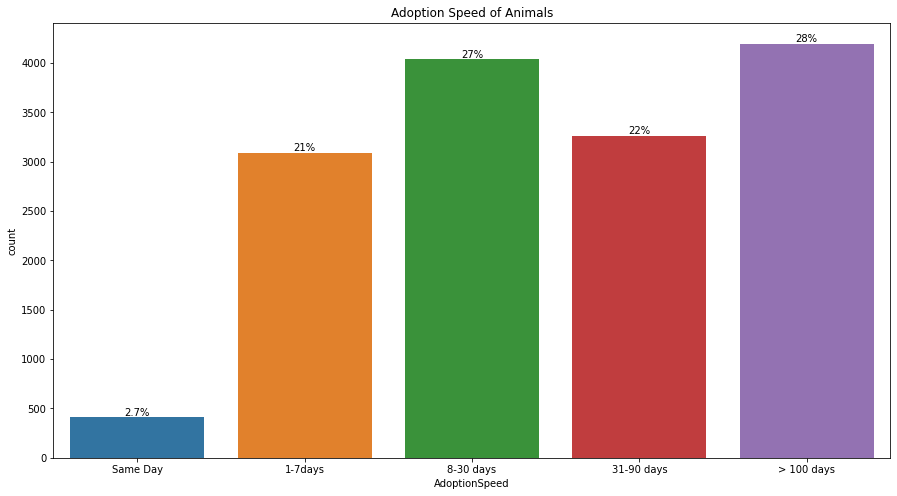

In [23]:
col = 'AdoptionSpeed'
title = "Adoption Speed of Animals"
xticklabels = ['Same Day', '1-7days','8-30 days','31-90 days','> 100 days']
plot_countplot(col, title, train, xticklabels)

### Type

In [24]:
train.Animal.value_counts(normalize = True)

Dog    0.543101
Cat    0.456899
Name: Animal, dtype: float64

**Dogs VS cats**

There are more dogs than cats in the dataset, but we see that cats are adopted a little faster than dogs.

Also, we can see that groups of cats are adopted more fast than groups of dogs (groups is more than one pet).

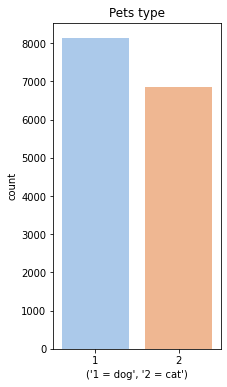

In [25]:
plt.figure(figsize=(3,6))
sns.countplot(train.Type, palette='pastel').set_title('Pets type')
plt.xlabel(('1 = dog','2 = cat'))
plt.show()

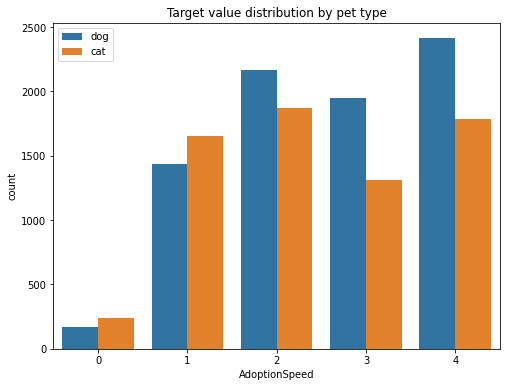

In [26]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="AdoptionSpeed", hue='Type', data=train)
ax.set_title('Target value distribution by pet type')
plt.legend(labels=['dog','cat'])
plt.show()

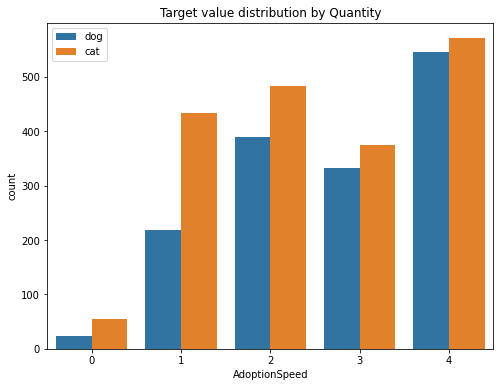

In [27]:
q = train[train['Quantity']>1]
# q.groupby('Type')['AdoptionSpeed'].size()
plt.figure(figsize=(8,6))
ax = sns.countplot(x="AdoptionSpeed", hue='Type', data=q)
ax.set_title('Target value distribution by Quantity')
plt.legend(labels=['dog','cat'])
plt.show()

### Breeds

Can we learn if there are prefferedd breeds?

In [28]:
cats = train[train['Animal'] == 'Cat']
cats_ct = pd.crosstab(cats['Main_Breed'], cats['_AdoptionSpeed'])
top_cat1 = cats_ct['Same Day'].sort_values(ascending=False)[:10]
top_cats2 = cats_ct['1-7 days'].sort_values(ascending=False)[:10]

low_cats1 = cats_ct['31-90 days'].sort_values(ascending=False)[:10]
low_cats2 = cats_ct['> 100 days'].sort_values(ascending=False)[:10]

In [29]:
popular_cats = pd.concat([top_cat1, top_cats2], axis=1)
popular_cats

Same Day  1-7 days
Main_Breed                              
Domestic Short Hair       92.0     780.0
Domestic Medium Hair      45.0     334.0
Persian                   20.0      77.0
Siamese                   18.0      87.0
Domestic Long Hair        17.0      99.0
Tabby                     10.0      82.0
Bengal                     6.0      23.0
Tuxedo                     5.0       NaN
Calico                     3.0      25.0
Oriental Long Hair         3.0       NaN
American Shorthair         NaN      22.0
Oriental Short Hair        NaN      17.0

In [30]:
unpopular_cats = pd.concat([low_cats1, low_cats2], axis=1)
unpopular_cats

31-90 days  > 100 days
Main_Breed                                  
Domestic Short Hair        753.0       976.0
Domestic Medium Hair       227.0       312.0
Tabby                       64.0        91.0
Domestic Long Hair          55.0        52.0
Siamese                     44.0        47.0
Persian                     38.0        34.0
Calico                      20.0        39.0
American Shorthair          14.0        37.0
Tuxedo                      10.0        18.0
Bengal                       9.0         NaN
Oriental Short Hair          NaN        33.0

Cross Breed:<br>
Where Breed2 != 0 and breed1 != breed2.

Fix breeds colums as data is messy:

In [31]:
train['new_Breeds'] = train.apply(new_breed, axis=1)
train['new_Breed1'] = train['new_Breeds'].apply(lambda x: x[0])
train['new_Breed2'] = train['new_Breeds'].apply(lambda x: x[1])

In [32]:
train['Cross_Breed'] = train.apply(lambda x: is_cross_breed(x['new_Breed1'], x['new_Breed2']), axis=1)

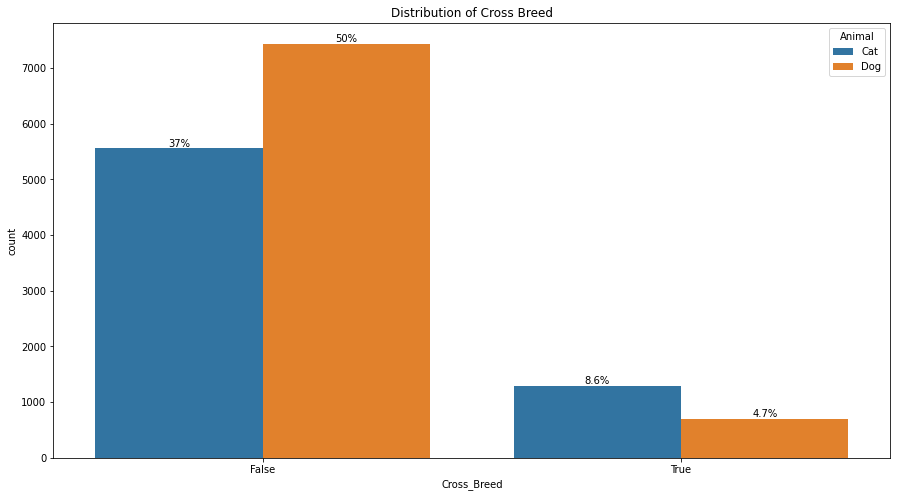

In [33]:
plot_countplot('Cross_Breed', 'Distribution of Cross Breed', train, hue='Animal')

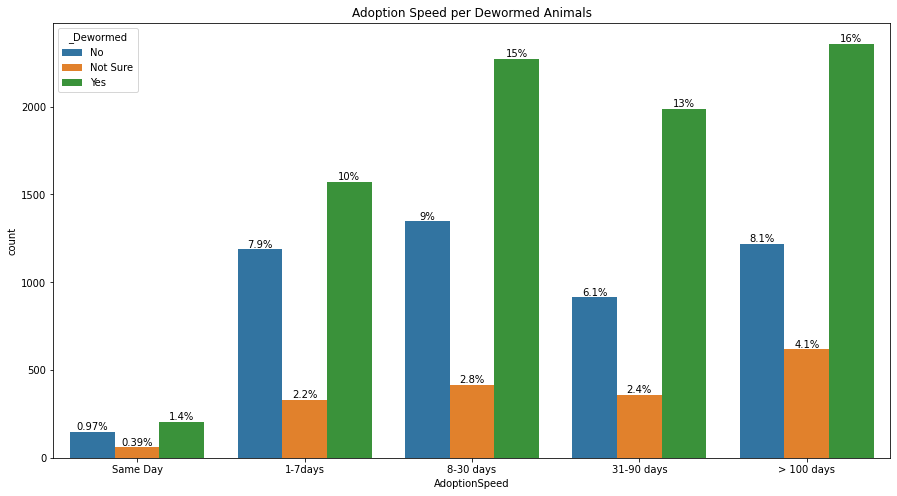

In [34]:
plot_countplot('AdoptionSpeed', "Adoption Speed per Dewormed Animals", train, xticklabels, hue="_Dewormed")

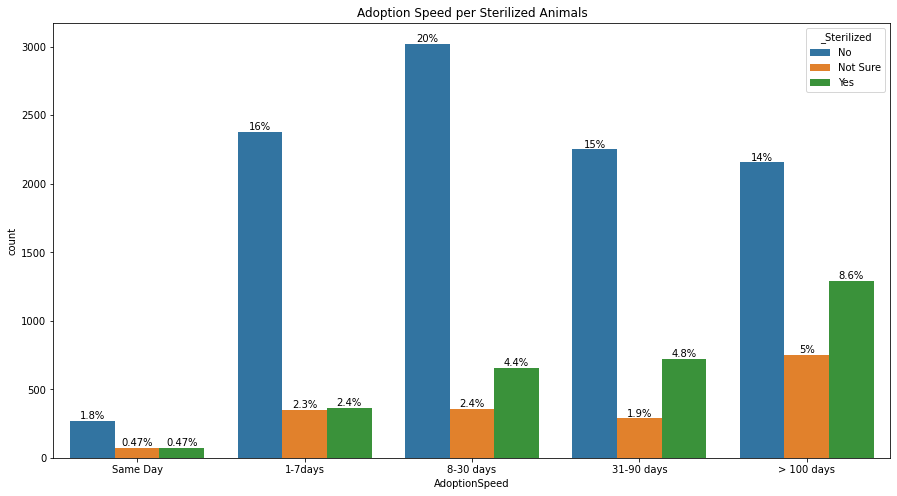

In [35]:
plot_countplot('AdoptionSpeed', "Adoption Speed per Sterilized Animals", train, xticklabels, hue="_Sterilized")

### Photo Amount



There is no sufficient evidence that the number of photos influence the Adoption Speed:

<Figure size 1440x720 with 0 Axes>

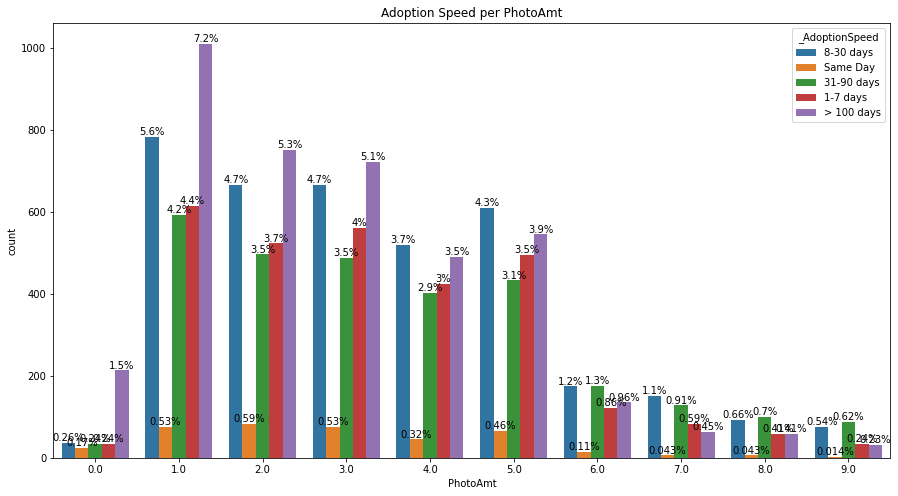

In [36]:
photos = train[train['PhotoAmt'] < 10.0]
plt.figure(figsize=(20, 10))
plot_countplot('PhotoAmt', 'Adoption Speed per PhotoAmt', photos, hue='_AdoptionSpeed')

### VideoAmt

<Figure size 1440x720 with 0 Axes>

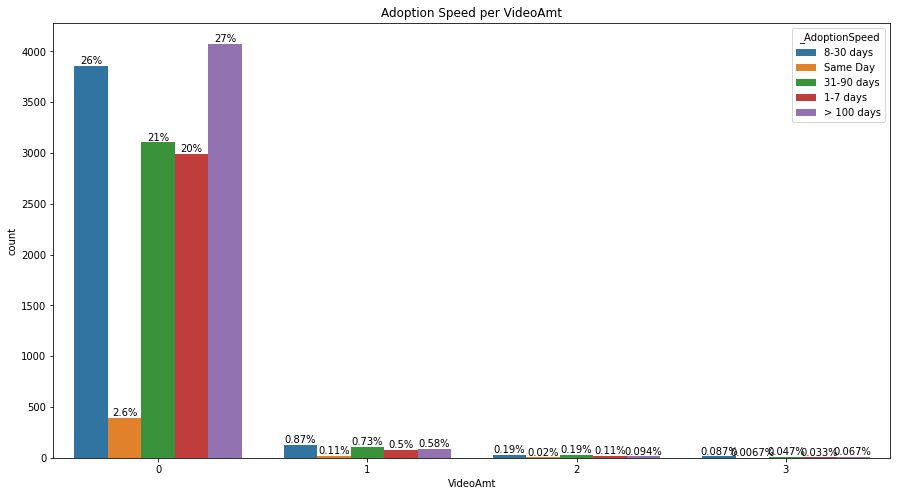

In [37]:
videos = train[train['VideoAmt'] < 4]
plt.figure(figsize=(20, 10))
plot_countplot('VideoAmt', 'Adoption Speed per VideoAmt', videos, hue='_AdoptionSpeed')

### Veterinary Treatments

Vaccination

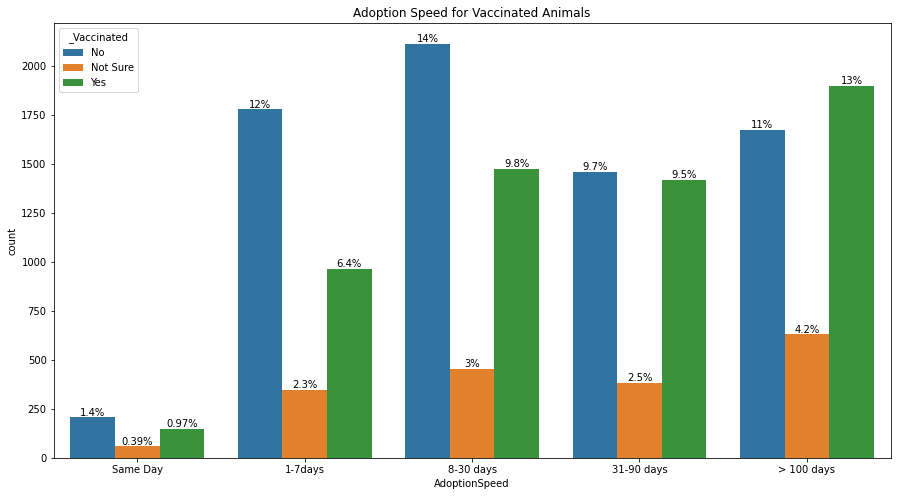

In [38]:
plot_countplot('AdoptionSpeed', "Adoption Speed for Vaccinated Animals", train, xticklabels, hue="_Vaccinated")

Dewormed

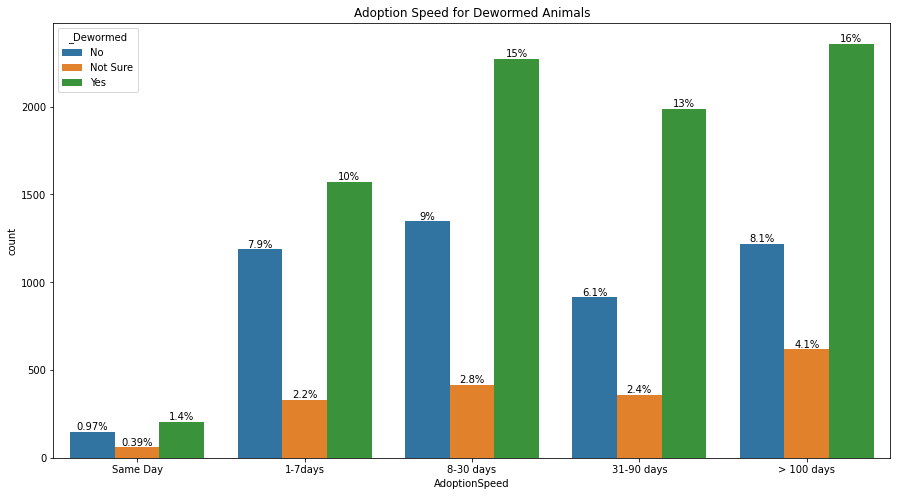

In [39]:
plot_countplot('AdoptionSpeed', "Adoption Speed for Dewormed Animals", train, xticklabels, hue="_Dewormed")

Sterilized

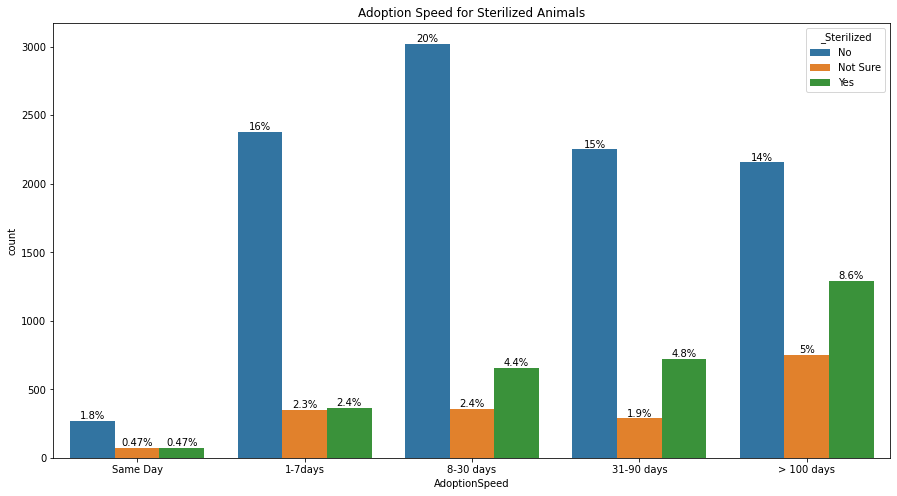

In [40]:
plot_countplot('AdoptionSpeed', "Adoption Speed for Sterilized Animals", train, xticklabels, hue="_Sterilized")

### Color

<Figure size 1440x576 with 0 Axes>

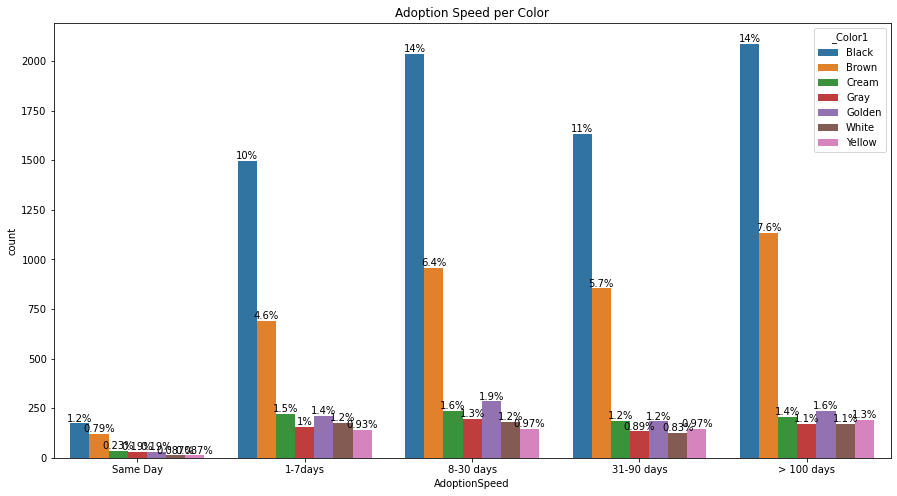

In [41]:
plt.figure(figsize=(20, 8))
plot_countplot('AdoptionSpeed', "Adoption Speed per Color", train, xticklabels, hue="_Color1")

### Fee

Almost 85% of pets had 0 adoption fee:

In [42]:
train["Fee"].value_counts(normalize=True)

0      0.844594
50     0.031215
100    0.027213
200    0.014607
150    0.010805
         ...   
170    0.000067
135    0.000067
14     0.000067
89     0.000067
190    0.000067
Name: Fee, Length: 74, dtype: float64

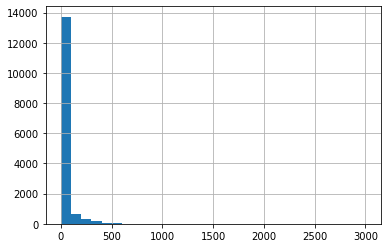

In [43]:
train["Fee"].hist(bins=30)

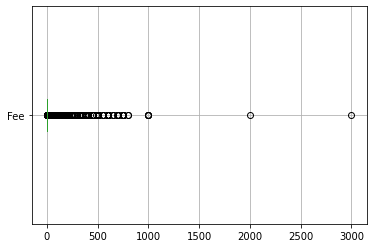

In [44]:
train.boxplot(column='Fee', vert=False )

Extreme higher fee is due to pets quantity, i.e. a group:

In [45]:
train[train["Fee"] >= 1000]["Quantity"] 

2078     1
4844     1
8722     2
8834     1
8879     1
10477    1
Name: Quantity, dtype: int64

### Health

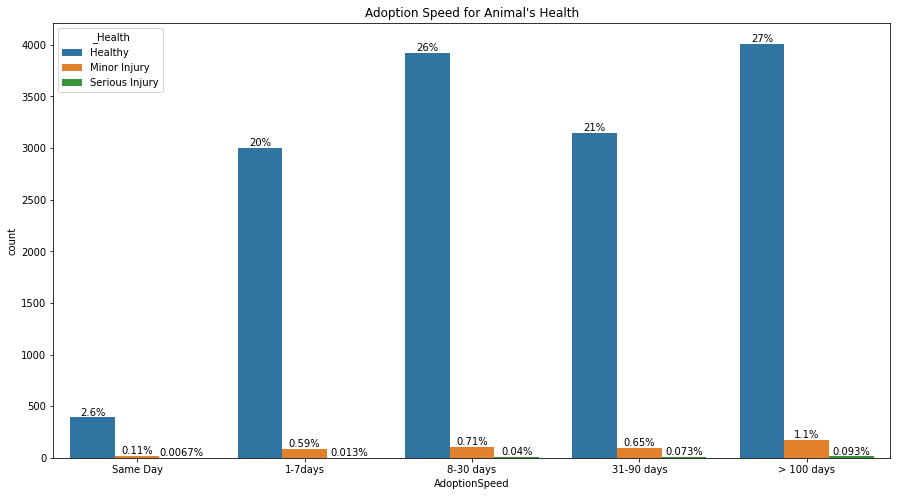

In [46]:
plot_countplot('AdoptionSpeed', "Adoption Speed for Animal's Health", train, xticklabels, hue="_Health")

Most of the pets are without fee and in healthy state

In [47]:
x = train['Health'].value_counts(normalize=True)
print(f'Pet health condition:\n{x}')
y=train['Fee'].value_counts()
print(f'Pet Fee:\n{y}') 

Pet health condition:
1    0.965651
2    0.032082
3    0.002268
Name: Health, dtype: float64
Pet Fee:
0      12663
50       468
100      408
200      219
150      162
       ...  
170        1
135        1
14         1
89         1
190        1
Name: Fee, Length: 74, dtype: int64


### Name

In [48]:
# normalize names
train['Name'] = train['Name'].replace('No Name','Unnamed')
train['Name'] = train['Name'].replace('No Name Yet','Unnamed')

Most Popular names for cats:

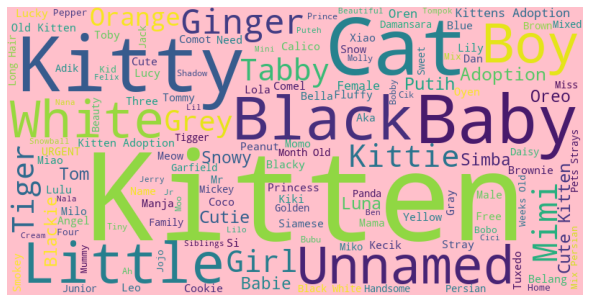

In [49]:
text_cat = ' '.join(train.loc[train['Animal'] == 'Cat', 'Name'].fillna('').values)
plot_word_cloud(text_cat)

Most Popular names for dogs:

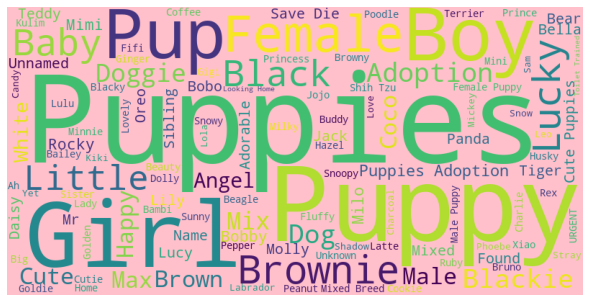

In [50]:
text_dog = ' '.join(train.loc[train['Animal'] == 'Dog', 'Name'].fillna('').values)
plot_word_cloud(text_dog)

In [51]:
# names of dogs vs. cats
# cats_df = pd.DataFrame({'Name': train['Name'],
#                              'Animal': train["Animal"]})
# scatter_text(cats_df, 'Animal', 'Name', 'Cat', 'Cat', "Dog")

In [52]:
# names of males vs. females
# cats_df = pd.DataFrame({'Name': train['Name'],
#                              'Gender': train["_Gender"]})
# scatter_text(cats_df, 'Gender', 'Name', 'Male', 'Male', "Female")

### Description
Description of the pet may contribute to its chances of being adopted.<br>

If the total sentiment of the description is positive, this can increase the chances of the pet in finding a home.<br>

We will process the text in the Description column using the NLP package spaCy & Google's Natural Language API.

In [53]:
# initialize spacy doc object
nlp = spacy.load('en_core_web_lg')

In [54]:
# normalize description text
train = clean_text(train)

In [55]:
# lemmatize description text 
train['Description'] = preprocess_pipe(train['Description'], lemmatize)
train['Description']

0        nibble be a    month old ball of cuteness he b...
1        I just find it alone yesterday near my apartme...
2        their pregnant mother be dump by her irrespons...
3        good guard dog very alert active obedience wai...
4        this handsome yet cute boy be up for adoption ...
                               ...                        
14988    I have    kitten that need to be adopt urgentl...
14989    seratofemale cat    color be    year old and e...
14990    mix breed good temperament kitten love human v...
14991    she be very shyadventure and independentshe ju...
14992    fili just love lay around and also love be und...
Name: Description, Length: 14993, dtype: object

#### Google's NLP API
https://cloud.google.com/natural-language/docs/basics

Each pet profile's description was analyzed through Google's Natural Language API, providing analysis on sentiment and key entities.<br>

The documentSentiment object contains the overall sentiment of the document, which consists of the following fields:



*   ***score*** of the sentiment ranges between -1.0 (negative) and 1.0 (positive) and corresponds to the overall emotional leaning of the text.

*   ***magnitude*** indicates the overall strength of emotion (both positive and negative) within the given text, between 0.0 and +inf.<br> Unlike score, magnitude is not normalized; each expression of emotion within the text contributes to the text's magnitude (so longer text blocks may have greater magnitudes).

*   ***language*** contains the language of the document.

*   ***sentences*** contains a list of the sentences extracted from the original document, with sentence level sentiment values, i.e. score and magnitude values.








#### Sentiments

The score of a description's sentiment indicates the overall emotion of a description.<br>
This value may contribute to the adoption speed.




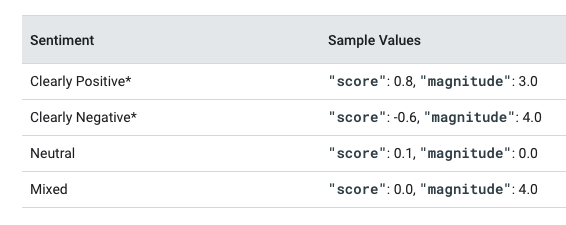

In [56]:
train_sentiment_files = sorted(glob.glob('/content/drive/MyDrive/PetFinder.my Adoption Prediction/train_sentiment/*.json'))

data = []
for i in range (len(train_sentiment_files)):
    with open(train_sentiment_files[i]) as jsonFile:
        jsonObject = json.load(jsonFile)
        jsonFile.close()

    score = jsonObject['documentSentiment']['score']
    magnitude = jsonObject['documentSentiment']['magnitude']
    path = train_sentiment_files[i]
    firstpos = path.rfind("/")
    lastpos = path.rfind(".")
    PetID = path[firstpos + 1 : lastpos]
    data.append([PetID, score, magnitude, score * magnitude])

sentiment_train = pd.DataFrame(data, columns=['PetID','Score', 'Magnitude', 'Sentiment'])

In [57]:
len(sentiment_train)

14452

In [58]:
sentiment_train.head()

PetID  Score  Magnitude  Sentiment
0  0008c5398    0.7        2.8       1.96
1  000a290e4    0.3        0.6       0.18
2  000fb9572    0.3        0.8       0.24
3  0011d7c25    0.8        0.8       0.64
4  00156db4a    0.0        1.8       0.00

In [59]:
train = pd.merge(train, sentiment_train, how="left", left_on="PetID", right_on='PetID')
train['Description_Sentiment'] = train.apply(lambda x: determine_sentiments(x['Score'], x['Magnitude']), axis=1)
train['Sentiment'] = train['Sentiment'].fillna(0)

In [60]:
train['Sentiment'] 

0        0.72
1       -0.14
2        0.74
3        0.81
4        2.22
         ... 
14988    1.00
14989    0.00
14990    2.00
14991    0.81
14992    0.81
Name: Sentiment, Length: 14993, dtype: float64

We can see that most of description sentiments are positive.<br>

We will use the numeric Sentiment feature, comprising of both the score and the magnitude of the text, for our further feature engineering phase.

<Figure size 2160x576 with 0 Axes>

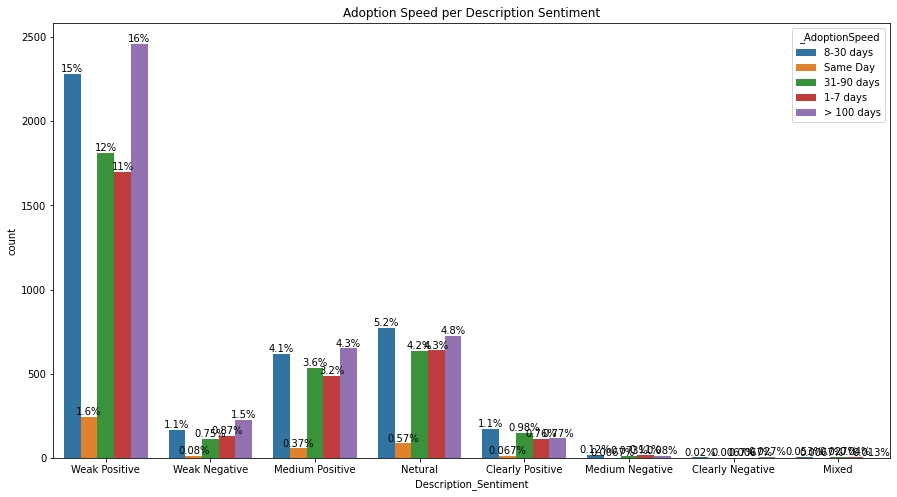

In [61]:
plt.figure(figsize=(30, 8))
plot_countplot('Description_Sentiment', 'Adoption Speed per Description Sentiment', train, hue='_AdoptionSpeed')

In [62]:
# train.plot.bar(x='AdoptionSpeed', y='Sentiment')

We see that most of the common words in description are quite the same in both groups (up to one month and over a month).

Text(0.5, 1.0, 'Adoption over 1 month')

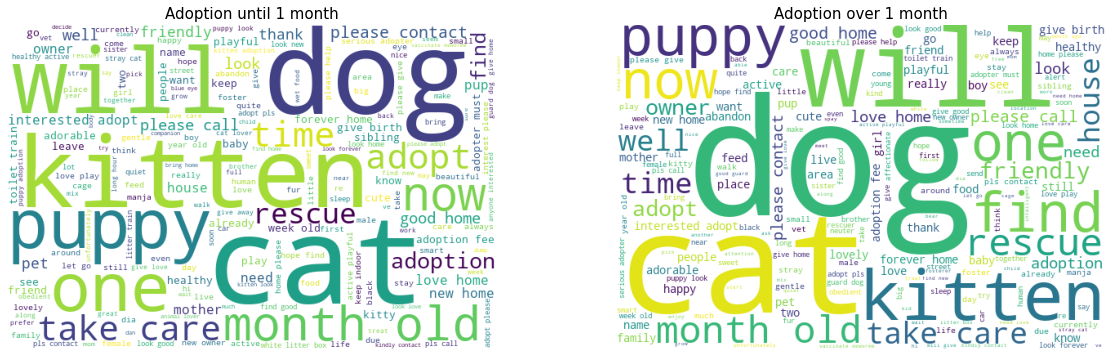

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 6])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(train[(train['AdoptionSpeed'] <=2)]['Description']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Adoption until 1 month',fontsize=15);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(train[(train['AdoptionSpeed'] >=3) ]['Description']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Adoption over 1 month',fontsize=15)

### Anomaly Detection (for outliers)

### Imbalanced Ratio
AdoptionSpeed = 0 (Same Day) has a low frequency.<br>
Ratio of imbalanced data is ~1:

In [64]:
train._AdoptionSpeed.value_counts(normalize = True) # we dont have an equal dis. between cats and dogs, is that a problem? (take into acount groups of same breed)

> 100 days    0.279931
8-30 days     0.269259
31-90 days    0.217368
1-7 days      0.206096
Same Day      0.027346
Name: _AdoptionSpeed, dtype: float64

In [65]:
# import matplotlib.colors as mcolors
# colors = list(mcolors.CSS4_COLORS.keys())[10:]

# def draw_histograms(df, features, rows, cols):
#     fig = plt.figure(figsize=(20,20))
#     for i, feature in enumerate(features):
#         ax = fig.add_subplot(rows, cols, i+1)
#         df[feature].hist(bins=20, ax=ax, facecolor=colors[i])
#         ax.set_title(feature + " Histogram", color=colors[35])
#         ax.set_yscale('log')
#     fig.tight_layout() 
#     plt.show()
    
# draw_histograms(df,df.columns,8,4)

The target AdoptionSpeed is imbalanced. 

In [66]:
train['Age'] = train.apply(new_age, axis =1)

In [67]:
train.loc[train.AdoptionSpeed == 0] # [anything special about this group? maybe bypass?] most of them comes from same state?

Type       Name       Age  Breed1  Breed2  Gender  Color1  Color2  \
1         2    Unnamed  0.005556     265       0       1       1       2   
75        1       Coco  0.013889     307       0       2       2       5   
106       2  SYLVESTER  0.005556     266     266       3       1       7   
170       2     Sunset  0.011111     292     252       1       2       5   
259       1   Chanelle  0.125000      20     307       2       2       7   
...     ...        ...       ...     ...     ...     ...     ...     ...   
14866     2     Cotton  0.088889     285     266       1       5       0   
14907     1       Milo  0.069444     190     307       1       2       7   
14923     1  Lab Mix 3  0.013889     307     141       2       2       0   
14952     2   Abg Long  0.066667     243     292       1       6       7   
14987     1      Snowy  0.041667     195       0       2       1       7   

       Color3  MaturitySize  ...  new_Breeds  new_Breed1  new_Breed2  \
1           0             2  ...    (265, 0)         265           0   
75          0             2  ...    (307, 0)         307           0   
106         0             2  ...    (266, 0)         266           0   
170         0             1  ...  (292, 252)         292         252   
259         0             2  ...    (307, 0)         307           0   
...       ...           ...  ...         ...         ...         ...   
14866       0             3  ...  (285, 266)         285         266   
14907       0             2  ...    (307, 0)         307           0   
14923       0             2  ...  (307, 141)         307         141   
14952       0             2  ...  (243, 292)         243         292   
14987       0             1  ...    (195, 0)         195           0   

       Cross_Breed  text_char_count  text_word_count  Score  Magnitude  \
1            False              118               23   -0.2        0.7   
75           False              148               30    0.4        1.2   
106          False              309               57    0.0        0.4   
170           True              262               50    0.8        0.8   
259          False               22                4    0.1        0.1   
...            ...              ...              ...    ...        ...   
14866         True              766              151    0.4        4.2   
14907        False              375               71    0.4        3.1   
14923         True              160               28    0.3        0.8   
14952         True              298               52    NaN        NaN   
14987        False                5                1    0.1        0.1   

      Sentiment  Description_Sentiment  
1         -0.14          Weak Negative  
75         0.48          Weak Positive  
106        0.00                Netural  
170        0.64          Weak Positive  
259        0.01          Weak Positive  
...         ...                    ...  
14866      1.68        Medium Positive  
14907      1.24        Medium Positive  
14923      0.24          Weak Positive  
14952      0.00                Netural  
14987      0.01          Weak Positive  

[410 rows x 48 columns]

# Feature Engineering

In [68]:
# descriptive cols remove
train.drop(descriptives_cols, axis=1, inplace=True)

# drop eda columns
eda_cols = ['new_Breeds', 
            'Breed1', 
            'Breed2', 
            'Description_Sentiment',
            'Cross_Breed',
            'Score', 
            'Magnitude', 
            'text_char_count',
            'text_word_count',
            'Description',
            ] 

train.drop(eda_cols, axis=1, inplace=True)

### Dataset Revised

In [69]:
data_reduced = train.copy()

### Simple Feature Reduction
Drop non contributing columns:


In [70]:
print(train.PetID.duplicated().sum())
print(train.PetID.isnull().sum())
cols_dropper(data_reduced,['Name', 'PetID'])

#data_reduced.drop(['Name', 'PetID'], axis=1, inplace=True)

0
0
Name was dropped
PetID was dropped
Index(['Type', 'Age', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'PhotoAmt',
       'AdoptionSpeed', 'new_Breed1', 'new_Breed2', 'Sentiment'],
      dtype='object')


In [71]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Age            14993 non-null  float64
 2   Gender         14993 non-null  int64  
 3   Color1         14993 non-null  int64  
 4   Color2         14993 non-null  int64  
 5   Color3         14993 non-null  int64  
 6   MaturitySize   14993 non-null  int64  
 7   FurLength      14993 non-null  int64  
 8   Vaccinated     14993 non-null  int64  
 9   Dewormed       14993 non-null  int64  
 10  Sterilized     14993 non-null  int64  
 11  Health         14993 non-null  int64  
 12  Quantity       14993 non-null  int64  
 13  Fee            14993 non-null  int64  
 14  State          14993 non-null  int64  
 15  RescuerID      14993 non-null  object 
 16  VideoAmt       14993 non-null  int64  
 17  PhotoAmt       14993 non-null  float64
 18  Adopti

In [72]:
data_reduced.head()

Type       Age  Gender  Color1  Color2  Color3  MaturitySize  FurLength  \
0     2  0.016667       1       1       7       0             1          1   
1     2  0.005556       1       1       2       0             2          2   
2     1  0.006944       1       2       7       0             2          2   
3     1  0.027778       2       1       2       0             2          1   
4     1  0.006944       1       1       0       0             2          1   

   Vaccinated  Dewormed  ...  Quantity  Fee  State  \
0           2         2  ...         1  100  41326   
1           3         3  ...         1    0  41401   
2           1         1  ...         1    0  41326   
3           1         1  ...         1  150  41401   
4           2         2  ...         1    0  41326   

                          RescuerID  VideoAmt PhotoAmt  AdoptionSpeed  \
0  8480853f516546f6cf33aa88cd76c379         0      1.0              2   
1  3082c7125d8fb66f7dd4bff4192c8b14         0      2.0              0   
2  fa90fa5b1ee11c86938398b60abc32cb         0      7.0              3   
3  9238e4f44c71a75282e62f7136c6b240         0      8.0              2   
4  95481e953f8aed9ec3d16fc4509537e8         0      3.0              2   

   new_Breed1  new_Breed2  Sentiment  
0         299           0       0.72  
1         265           0      -0.14  
2         307           0       0.74  
3         307           0       0.81  
4         307           0       2.22  

[5 rows x 22 columns]

#### Looking for Patterns

Correlations to target variable:<br>
We can see no linear correlations were found.

In [73]:
data_reduced.corr().abs()["AdoptionSpeed"].sort_values(ascending=False)

AdoptionSpeed    1.000000
new_Breed1       0.127257
Age              0.098217
FurLength        0.091337
Type             0.091240
new_Breed2       0.090831
Sterilized       0.083447
Quantity         0.062931
Vaccinated       0.059043
Gender           0.057622
MaturitySize     0.045653
Color1           0.044192
Color2           0.038579
Health           0.029382
PhotoAmt         0.023233
Sentiment        0.022990
Dewormed         0.013210
State            0.013119
Color3           0.007014
Fee              0.004017
VideoAmt         0.000571
Name: AdoptionSpeed, dtype: float64

### Features Correlations

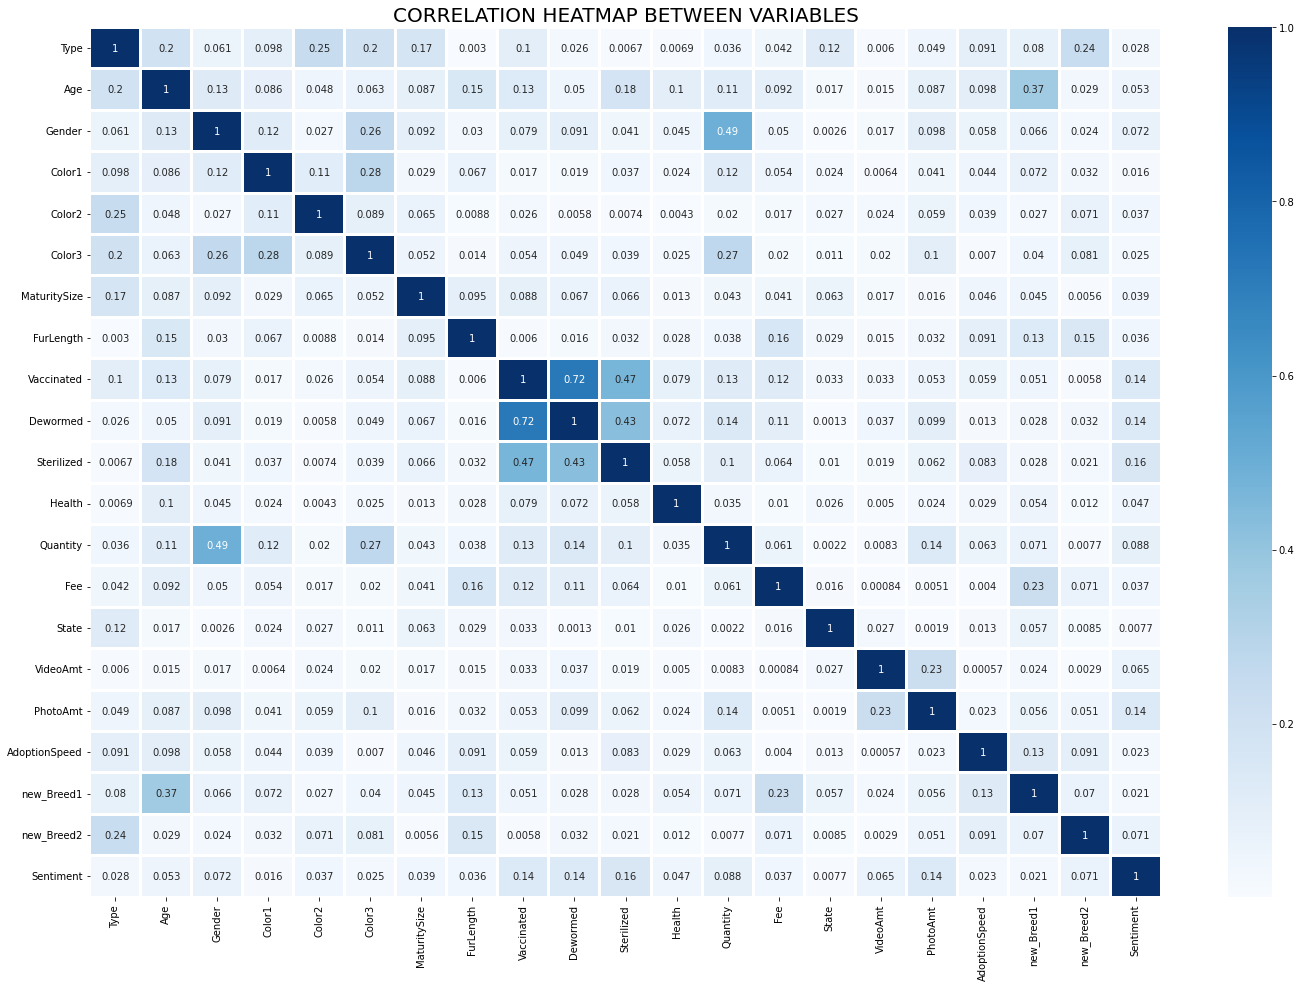

In [74]:
plt.figure(figsize=(24,16)) 
sns.heatmap(data_reduced.corr().abs(), annot=True, linewidths = 2, cmap="Blues") 
title = 'Correlation Heatmap between variables'.upper()
plt.title(title, fontsize =20, loc='center')
plt.show()

#notice correltion between gender and quantity
#notice coerrelation between vaccinated,dewarmed and sterilized

In [75]:
# AdoptionSpeed -  THE target
pd.crosstab(columns=data_reduced.AdoptionSpeed, 
            index=train.Type, margins=True) #,normalize='index')

AdoptionSpeed    0     1     2     3     4    All
Type                                             
1              170  1435  2164  1949  2414   8132
2              240  1655  1873  1310  1783   6861
All            410  3090  4037  3259  4197  14993

In [76]:
fig = px.box(data_reduced, x="Type", y='Age', color="AdoptionSpeed")
fig.show()

In [77]:
#is this the best graph? not sure
fig = px.bar(pd.crosstab(columns=train.AdoptionSpeed, #still needs some work! x-axis should be categorical and not numeric
            index=train.Type, normalize='index'), height =400)
fig.show()

In [78]:
# first create checkpoint - lara why you've created a copy from train and not from data_reduced??
data_reduced2 = data_reduced.copy()

In [79]:
data_reduced2.head(2)

Type       Age  Gender  Color1  Color2  Color3  MaturitySize  FurLength  \
0     2  0.016667       1       1       7       0             1          1   
1     2  0.005556       1       1       2       0             2          2   

   Vaccinated  Dewormed  ...  Quantity  Fee  State  \
0           2         2  ...         1  100  41326   
1           3         3  ...         1    0  41401   

                          RescuerID  VideoAmt PhotoAmt  AdoptionSpeed  \
0  8480853f516546f6cf33aa88cd76c379         0      1.0              2   
1  3082c7125d8fb66f7dd4bff4192c8b14         0      2.0              0   

   new_Breed1  new_Breed2  Sentiment  
0         299           0       0.72  
1         265           0      -0.14  

[2 rows x 22 columns]

Transform: Encoding Interaction Features


In [80]:
data_reduced2['Vaccinated'] = replace_unknown(data_reduced2, 'Vaccinated')
data_reduced2['Dewormed'] = replace_unknown(data_reduced2, 'Dewormed')
data_reduced2['Sterilized'] = replace_unknown(data_reduced2, 'Sterilized')

In [81]:
data_reduced2['Vaccinated'] = replace_unknown(data_reduced2, 'Vaccinated')
data_reduced2['Dewormed'] = replace_unknown(data_reduced2, 'Dewormed')
data_reduced2['Sterilized'] = replace_unknown(data_reduced2, 'Sterilized')

In [82]:
data_reduced2['interaction'] = cocncat_5cols(data_reduced2, 'Type', 'Gender', 'Vaccinated', 'Dewormed', 'Sterilized')
data_reduced2['Breed_full'] = cocncat_2cols(data_reduced2, 'new_Breed1', 'new_Breed2')
data_reduced2['Color_full'] = cocncat_3cols(data_reduced2, 'Color1', 'Color2', 'Color3')

cols_dropper(data_reduced2,['Type','Gender'])

Type was dropped
Gender was dropped
Index(['Age', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt', 'PhotoAmt', 'AdoptionSpeed',
       'new_Breed1', 'new_Breed2', 'Sentiment', 'interaction', 'Breed_full',
       'Color_full'],
      dtype='object')


In [83]:
data_reduced2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            14993 non-null  float64
 1   Color1         14993 non-null  int64  
 2   Color2         14993 non-null  int64  
 3   Color3         14993 non-null  int64  
 4   MaturitySize   14993 non-null  int64  
 5   FurLength      14993 non-null  int64  
 6   Vaccinated     5898 non-null   float64
 7   Dewormed       8397 non-null   float64
 8   Sterilized     3101 non-null   float64
 9   Health         14993 non-null  int64  
 10  Quantity       14993 non-null  int64  
 11  Fee            14993 non-null  int64  
 12  State          14993 non-null  int64  
 13  RescuerID      14993 non-null  object 
 14  VideoAmt       14993 non-null  int64  
 15  PhotoAmt       14993 non-null  float64
 16  AdoptionSpeed  14993 non-null  int64  
 17  new_Breed1     14993 non-null  int64  
 18  new_Br

Create dummy variables

In [84]:
# double check the function, write now it runs manually
# data_reduced2 = get_dummies(data_reduced2, 'Type') 
# cols_dropper(data_reduced2,['Type_1'])
# data_reduced2 = get_dummies(data_reduced2, 'Gender')

# data_reduced2 = pd.get_dummies(data_reduced2, columns = ['Type'], drop_first = True)
# data_reduced2 = pd.get_dummies(data_reduced2, columns = ['Gender'])

In [85]:
data_reduced2.head()

Age  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  \
0  0.016667       1       7       0             1          1         NaN   
1  0.005556       1       2       0             2          2         NaN   
2  0.006944       2       7       0             2          2         1.0   
3  0.027778       1       2       0             2          1         1.0   
4  0.006944       1       0       0             2          1         NaN   

   Dewormed  Sterilized  Health  ...                         RescuerID  \
0       NaN         NaN       1  ...  8480853f516546f6cf33aa88cd76c379   
1       NaN         NaN       1  ...  3082c7125d8fb66f7dd4bff4192c8b14   
2       1.0         NaN       1  ...  fa90fa5b1ee11c86938398b60abc32cb   
3       1.0         NaN       1  ...  9238e4f44c71a75282e62f7136c6b240   
4       NaN         NaN       1  ...  95481e953f8aed9ec3d16fc4509537e8   

   VideoAmt  PhotoAmt AdoptionSpeed  new_Breed1  new_Breed2  Sentiment  \
0         0       1.0             2         299           0       0.72   
1         0       2.0             0         265           0      -0.14   
2         0       7.0             3         307           0       0.74   
3         0       8.0             2         307           0       0.81   
4         0       3.0             2         307           0       2.22   

     interaction  Breed_full  Color_full  
0  21nan_nan_nan       299_0       1_7_0  
1  21nan_nan_nan       265_0       1_2_0  
2  111.0_1.0_nan       307_0       2_7_0  
3  121.0_1.0_nan       307_0       1_2_0  
4  11nan_nan_nan       307_0       1_0_0  

[5 rows x 23 columns]

In [86]:
cols_dropper(data_reduced2,['Color1', 
                            'Color2',
                            'Color3',
                            'new_Breed1',
                            'new_Breed2' ])

Color1 was dropped
Color2 was dropped
Color3 was dropped
new_Breed1 was dropped
new_Breed2 was dropped
Index(['Age', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'PhotoAmt', 'AdoptionSpeed', 'Sentiment', 'interaction',
       'Breed_full', 'Color_full'],
      dtype='object')


In [87]:
data_reduced2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            14993 non-null  float64
 1   MaturitySize   14993 non-null  int64  
 2   FurLength      14993 non-null  int64  
 3   Vaccinated     5898 non-null   float64
 4   Dewormed       8397 non-null   float64
 5   Sterilized     3101 non-null   float64
 6   Health         14993 non-null  int64  
 7   Quantity       14993 non-null  int64  
 8   Fee            14993 non-null  int64  
 9   State          14993 non-null  int64  
 10  RescuerID      14993 non-null  object 
 11  VideoAmt       14993 non-null  int64  
 12  PhotoAmt       14993 non-null  float64
 13  AdoptionSpeed  14993 non-null  int64  
 14  Sentiment      14993 non-null  float64
 15  interaction    14993 non-null  object 
 16  Breed_full     14993 non-null  object 
 17  Color_full     14993 non-null  object 
dtypes: flo

Normalize Fee, PhotosAmt, VideoAmt according to pets quantity:

In [88]:
data_reduced2['Fee'] = data_reduced2.Fee/ data_reduced2.Quantity

Transform: Convert PhotoAmt to a Binary Feature

In [89]:
data_reduced2['VideoAmt'] = data_reduced2['VideoAmt'].apply(has_media)
data_reduced2['PhotoAmt'] = data_reduced2['PhotoAmt'].apply(has_media)

Transform: Convert Quantity to a Binary Feature

In [90]:
data_reduced2['Quantity'] = data_reduced2.apply(new_Quantity,axis =1)
#data_reduced2.Quantity.unique()

Transform: Target Encoding

In [91]:
# mean_encode(data_reduced2,'Breed_full','AdoptionSpeed')
# mean_encode(data_reduced2,'State','AdoptionSpeed')
# mean_encode(data_reduced2,'RescuerID','AdoptionSpeed')
# mean_encode(data_reduced2,'Color_full','AdoptionSpeed')
# mean_encode(data_reduced2,'interaction','AdoptionSpeed')

In [92]:
# # handling with RescuerID column
# target_encoded_RecuerID = target_encode_multi(data_reduced2[['RescuerID']], 
#                                               data_reduced2['AdoptionSpeed'])
# target_encoded_RecuerID.head()

In [93]:
#combining category 0 with 1 as Amit suggested :)
data_reduced2['AdoptionSpeed'] = data_reduced2['AdoptionSpeed'].replace([0],1)

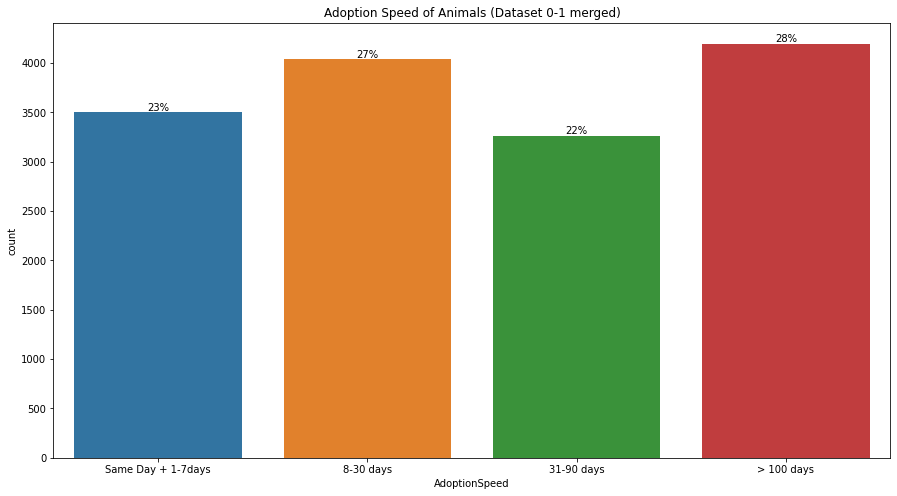

In [94]:
col = 'AdoptionSpeed'
title = "Adoption Speed of Animals (Dataset 0-1 merged)"
xticklabels = ['Same Day + 1-7days','8-30 days','31-90 days','> 100 days']
plot_countplot(col, title, data_reduced2, xticklabels)

In [95]:
col_list = ['RescuerID','interaction','Breed_full','Color_full','State']
# changing the columns to str for encoding
for name in col_list :
  data_reduced2[name] = data_reduced2[name].astype('object')
# returns the df with the encoding columns
# encode_columns = target_encode_multi(data_reduced2,data_reduced2['AdoptionSpeed'],col_list)
# encode_columns.head()
data_reduced2 = target_encode_multi(data_reduced2,data_reduced2['AdoptionSpeed'],col_list)

In [96]:
cols_dropper(data_reduced2,['Vaccinated', 
                            'Dewormed',
                            'Sterilized'])

Vaccinated was dropped
Dewormed was dropped
Sterilized was dropped
Index(['Age', 'MaturitySize', 'FurLength', 'Health', 'Quantity', 'Fee',
       'VideoAmt', 'PhotoAmt', 'AdoptionSpeed', 'Sentiment',
       'RescuerID_AdoptionSpeed_1', 'interaction_AdoptionSpeed_1',
       'Breed_full_AdoptionSpeed_1', 'Color_full_AdoptionSpeed_1',
       'State_AdoptionSpeed_1', 'RescuerID_AdoptionSpeed_2',
       'interaction_AdoptionSpeed_2', 'Breed_full_AdoptionSpeed_2',
       'Color_full_AdoptionSpeed_2', 'State_AdoptionSpeed_2',
       'RescuerID_AdoptionSpeed_3', 'interaction_AdoptionSpeed_3',
       'Breed_full_AdoptionSpeed_3', 'Color_full_AdoptionSpeed_3',
       'State_AdoptionSpeed_3', 'RescuerID_AdoptionSpeed_4',
       'interaction_AdoptionSpeed_4', 'Breed_full_AdoptionSpeed_4',
       'Color_full_AdoptionSpeed_4', 'State_AdoptionSpeed_4'],
      dtype='object')


Final view at the dataset:

In [97]:
data_reduced2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          14993 non-null  float64
 1   MaturitySize                 14993 non-null  int64  
 2   FurLength                    14993 non-null  int64  
 3   Health                       14993 non-null  int64  
 4   Quantity                     14993 non-null  int64  
 5   Fee                          14993 non-null  float64
 6   VideoAmt                     14993 non-null  int64  
 7   PhotoAmt                     14993 non-null  int64  
 8   AdoptionSpeed                14993 non-null  int64  
 9   Sentiment                    14993 non-null  float64
 10  RescuerID_AdoptionSpeed_1    14993 non-null  float64
 11  interaction_AdoptionSpeed_1  14993 non-null  float64
 12  Breed_full_AdoptionSpeed_1   14993 non-null  float64
 13  Color_full_Adopt

In [98]:
data_reduced2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          14993 non-null  float64
 1   MaturitySize                 14993 non-null  int64  
 2   FurLength                    14993 non-null  int64  
 3   Health                       14993 non-null  int64  
 4   Quantity                     14993 non-null  int64  
 5   Fee                          14993 non-null  float64
 6   VideoAmt                     14993 non-null  int64  
 7   PhotoAmt                     14993 non-null  int64  
 8   AdoptionSpeed                14993 non-null  int64  
 9   Sentiment                    14993 non-null  float64
 10  RescuerID_AdoptionSpeed_1    14993 non-null  float64
 11  interaction_AdoptionSpeed_1  14993 non-null  float64
 12  Breed_full_AdoptionSpeed_1   14993 non-null  float64
 13  Color_full_Adopt

# Model

## Split

In [99]:
X = data_reduced2.drop('AdoptionSpeed', axis=1)
y = data_reduced2['AdoptionSpeed']

# X_train, X_test, y_train, y_test = \
#     split(X, y, train_size=0.7, test_size=0.3, 
#                      random_state=7109179, shuffle=True, stratify=y)


#implemented StratifiedKFold splitting of the dataset
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, random_state=1991, shuffle=True)

for train, test in kfold.split(X,y):
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

## Yellowbrick - A Diagnostic Tool to Visualise Machine Learning

Feature Analysis Visualizers

Detect separability between classes, E.g. is there an opportunity to learn from the feature set or is there just too much noise?<br>


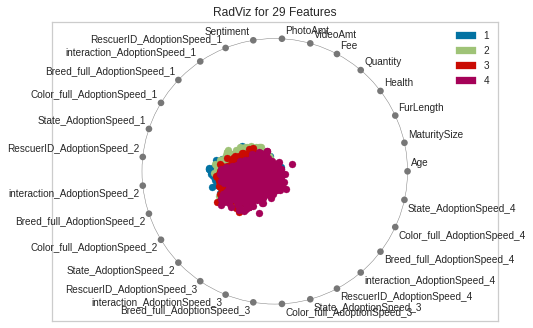

In [100]:
from yellowbrick.features import RadViz

# Specify the target classes
classes = [1, 2, 3, 4]

# Instantiate the visualizer
visualizer = RadViz(classes=classes)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

Rank Features

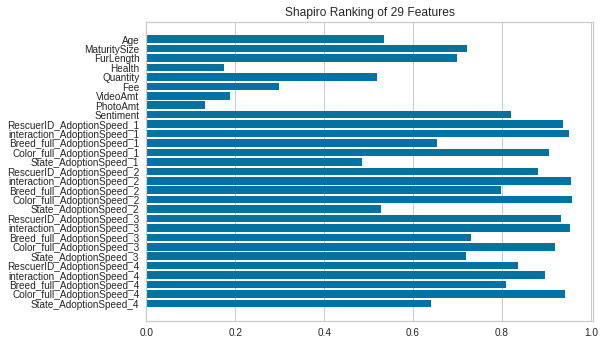

In [101]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

PCA Projection<br>



In [102]:
# from yellowbrick.features import pca_decomposition

# classes = [1,2,3,4]

# # Create, fit, and show the visualizer
# pca_decomposition(X, y, scale=True, classes=classes)

Manifold Visualization

In [103]:
# from yellowbrick.features import Manifold

# classes = [1,2,3,4]

# # Instantiate the visualizer
# viz = Manifold(manifold="tsne", classes=classes)

# viz.fit_transform(X, y)  # Fit the data to the visualizer
# viz.show()               # Finalize and render the figure
# visualizer.show()

Joint Plot Visualization

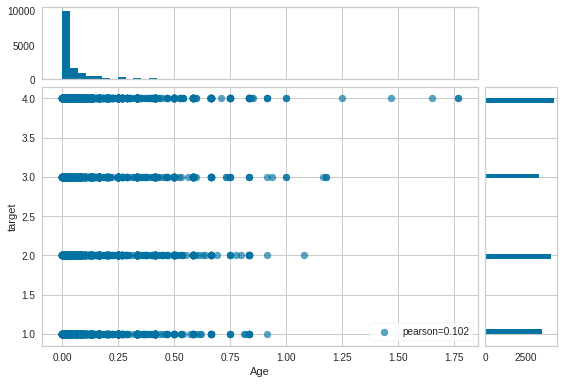

In [104]:
from yellowbrick.features import joint_plot

# Instantiate the visualizer
visualizer = joint_plot(X, y, columns="Age")

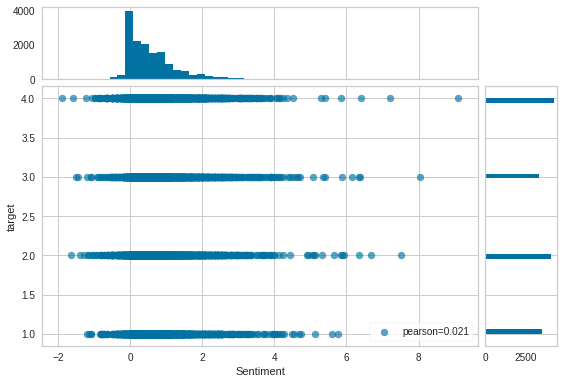

In [105]:
from yellowbrick.features import joint_plot

# Instantiate the visualizer
visualizer = joint_plot(X, y, columns="Sentiment")

Target Visualizers

Class Balance<br>
Creating a bar chart of the support for each class, that is the frequency of the classes’ representation in the dataset.

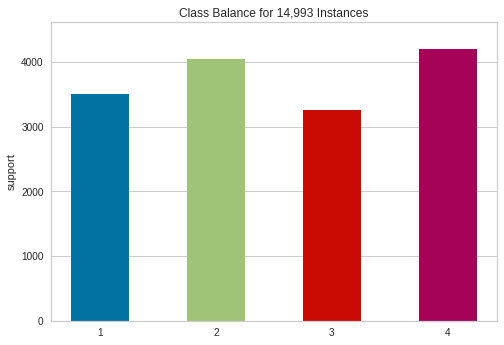

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa02b20f3d0>)

In [106]:
from yellowbrick.target import class_balance

# Use the quick method and immediately show the figure
class_balance(y)

Feature Correlation

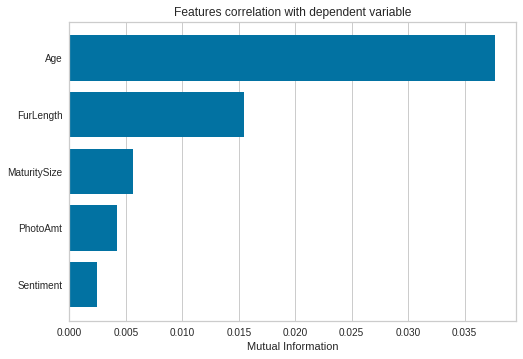

In [107]:
from yellowbrick.target import FeatureCorrelation

# Create a list of the features to plot
features = ['Age', 'Sentiment', 'MaturitySize', 'FurLength', 'PhotoAmt']

# Instaniate the visualizer
visualizer = FeatureCorrelation(
    method='mutual_info-classification', feature_names=features, sort=True
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()              # Finalize and render the figure

## Preliminary Analysis

In [108]:
data_reduced2.isna().sum()

Age                            0
MaturitySize                   0
FurLength                      0
Health                         0
Quantity                       0
Fee                            0
VideoAmt                       0
PhotoAmt                       0
AdoptionSpeed                  0
Sentiment                      0
RescuerID_AdoptionSpeed_1      0
interaction_AdoptionSpeed_1    0
Breed_full_AdoptionSpeed_1     0
Color_full_AdoptionSpeed_1     0
State_AdoptionSpeed_1          0
RescuerID_AdoptionSpeed_2      0
interaction_AdoptionSpeed_2    0
Breed_full_AdoptionSpeed_2     0
Color_full_AdoptionSpeed_2     0
State_AdoptionSpeed_2          0
RescuerID_AdoptionSpeed_3      0
interaction_AdoptionSpeed_3    0
Breed_full_AdoptionSpeed_3     0
Color_full_AdoptionSpeed_3     0
State_AdoptionSpeed_3          0
RescuerID_AdoptionSpeed_4      0
interaction_AdoptionSpeed_4    0
Breed_full_AdoptionSpeed_4     0
Color_full_AdoptionSpeed_4     0
State_AdoptionSpeed_4          0
dtype: int

In [109]:
ds_train = Dataset(X_train, label=y_train, cat_features=[])
ds_test =  Dataset(X_test,  label=y_test, cat_features=[])

integ_suite = single_dataset_integrity()
integ_suite.run(ds_train)

<!DOCTYPE html>
 
 
 
 Suite Output 
 
 
 
 
 

<!-- Load require.js. Delete this if your page already loads require.js -->

## XGBoost

In [110]:
import time

start = time.time()

eval_set = [(X_test, y_test)]
# clf_xgb = xgb.XGBClassifier(objective = 'multi:softmax', missing = None, seed = 42)
clf_xgb = xgb.XGBClassifier(colsample_bytree=0.5, learning_rate=0.03, max_depth=1,
              objective='multi:softprob', red_lambda=0.03, seed=42,n_estimators = 200,
              subsample=0.9)
clf_xgb.fit(X_train,
            y_train,
            verbose = True, #print during run
            early_stopping_rounds = 10, # stop 50 steps after convergence
            eval_metric = 'mlogloss',
            eval_set= eval_set)

end = time.time()
diff = end - start
print(f'Executtion time is: {diff}')

[0]	validation_0-mlogloss:1.38001
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.36994
[2]	validation_0-mlogloss:1.36204
[3]	validation_0-mlogloss:1.35635
[4]	validation_0-mlogloss:1.35021
[5]	validation_0-mlogloss:1.34573
[6]	validation_0-mlogloss:1.33713
[7]	validation_0-mlogloss:1.33389
[8]	validation_0-mlogloss:1.3316
[9]	validation_0-mlogloss:1.32842
[10]	validation_0-mlogloss:1.32413
[11]	validation_0-mlogloss:1.3174
[12]	validation_0-mlogloss:1.30976
[13]	validation_0-mlogloss:1.30435
[14]	validation_0-mlogloss:1.29957
[15]	validation_0-mlogloss:1.2941
[16]	validation_0-mlogloss:1.29232
[17]	validation_0-mlogloss:1.28695
[18]	validation_0-mlogloss:1.28043
[19]	validation_0-mlogloss:1.27668
[20]	validation_0-mlogloss:1.27273
[21]	validation_0-mlogloss:1.27103
[22]	validation_0-mlogloss:1.26785
[23]	validation_0-mlogloss:1.26494
[24]	validation_0-mlogloss:1.26144
[25]	validation_0-mlogloss:1.25931
[26]	validation_0-mlogloss:1.25661

Analysis after the model runs:

In [111]:
suite = full_suite()
suite.run(train_dataset=ds_train, test_dataset=ds_test, model=clf_xgb)

<!DOCTYPE html>
 
 
 
 Suite Output 
 
 
 
 
 

<!-- Load require.js. Delete this if your page already loads require.js -->

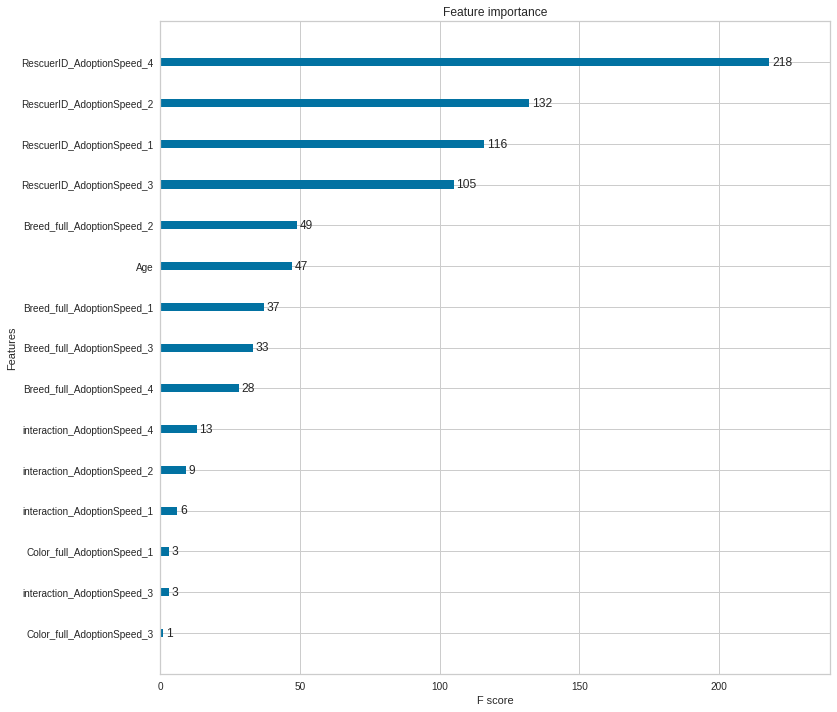

In [112]:
# Using Built-in XGBoost Feature Importance Plot
from matplotlib import pyplot
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12, 12))
plot_importance(clf_xgb,ax=ax)
pyplot.show()

In [113]:
train_score = clf_xgb.score(X_train,y_train)
test_score = clf_xgb.score(X_test,y_test)

print(f'test score of the train is {train_score}')
print(f'test score of the test is {test_score}')

test score of the train is 0.5493955814922884
test score of the test is 0.5570380253502335


In [114]:
y_pred= clf_xgb.predict(X_test)

              precision    recall  f1-score   support

           1       0.68      0.44      0.53       700
           2       0.51      0.51      0.51       807
           3       0.57      0.35      0.43       652
           4       0.54      0.86      0.66       839

    accuracy                           0.56      2998
   macro avg       0.57      0.54      0.54      2998
weighted avg       0.57      0.56      0.54      2998



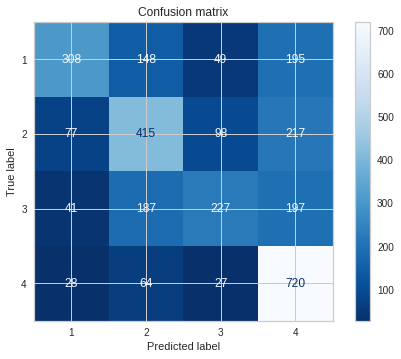

In [115]:
print(metrics.classification_report(y_test,clf_xgb.predict(X_test)))
# print(roc_auc_score(y_test, y_pred, multi_class='ovr'))
metrics.plot_confusion_matrix(clf_xgb,X_test,y_test,cmap='Blues_r')
plt.title('Confusion matrix')
plt.show()

###RandomSearch

In [117]:
params={
    "learning_rate": [0.1,0.15,0.2,],
    "colsample_bytree" : [0.5,0.8],
        'gamma': [0,0.35,0.4],
        'subsample': [0.9],
        'colsample_bytree': [0.9],
        "min_child_weight" : [ 1,2 ],
        'max_depth': [3,4,5],
        'n_estimators' : [40,30,50],
        'alpha': [0,0.5],
        'objective': 'multi:softprob'
    }

Params_grid = {
    "learning_rate": [0.3,0.35,0.25,],
    "colsample_bytree" : [0.2,0.6],
        'gamma': [0,0.35,0.45],
        # 'subsample': [0.9],
        # 'colsample_bytree': [0.9],
        "min_child_weight" : [ 1,3 ],
        'max_depth': [6,7],
        'n_estimators' : [60,70,80],
        'alpha': [0,0.3],
        'objective': 'multi:softprob'
    }

random_search=RandomizedSearchCV(clf_xgb,param_distributions=Params,n_iter=100,cv=5,verbose=3)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)
print(random_search.best_params_)

NameError: ignored

### GridSearch

In [ ]:
# parameters from other notebooks for reference:



# MODEL_PARAMS_XGB = {
#     'eval_metric': 'rmse',
#     'seed': 1337,
#     'eta': 0.01,
#     'subsample': 0.8,
#     'colsample_bytree': 0.85,
#     'tree_method': 'gpu_hist',
#     'device': 'gpu',
#     'silent': 1

# FIT_PARAMS = {
#     'num_boost_round': 5000,
#     'early_stopping_rounds': 100,
#     'verbose_eval': 5000


# params = {
#         'objective': 'reg:linear', #huber
#         'eval_metric':'rmse',
#         'eta': 0.01,
#         'tree_method':'gpu_hist',
#         'max_depth': 9,  
#         'subsample': 0.85,  
#         'colsample_bytree': 0.7,     
#         'alpha': 0.01,  

# , num_boost_round = 10000, 
# evals=[(d_valid,'val')],
# early_stopping_rounds=100, #feval=xgb_eval_kappa,
# verbose_eval=500)

    # params = {'eval_metric': 'rmse',
    #           'seed': 1337,
    #           'eta': 0.0123,
    #           'subsample': 0.7,
    #           'colsample_bytree': 0.75,
    #           'tree_method': 'gpu_hist',
    #           'device': 'gpu',
    #           'silent': 1,
    #           'gamma' : 8,
    #           'max_depth' : 7
    #           }
    # n_splits = 10
    # verbose_eval = 1000
    # num_rounds = 10000
    # early_stop = 500

In [119]:
#test 1
# Params_grid = {
#     'max_depth' : [3,4,5],
#     'learning_rate' : [0.1, 0.01, 0.05],
#     'gamma' : [0,0.25, 1.0],
#     'red_lambda' : [0,1.0, 10.0]}

# optimal_p = GridSearchCV(
#     estimator = xgb.XGBClassifier(objective = 'multi:softmax',
#                                   subsample= 0.9, 
#                                   seed = 42,
#                                   colsample_bytree= 0.5),
#                          param_grid = Params_grid,
#                          scoring='roc_auc',
#                          verbose = 2,
#                          n_jobs = -1,
#                          refit=True,
#                          cv = kfold) 

#{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'red_lambda': 0}
#XGBClassifier(colsample_bytree=0.5, objective='multi:softprob', red_lambda=0, seed=42, subsample=0.9)

##test 2

# Params_grid = {
#     'max_depth' : [1,2,3],
#     'learning_rate' : [0.03, 0.06, 0.09],
#     'gamma' : [0,0.0625, 0.125],
#     'red_lambda' : [0.03, 0.06, 0.09]}

# optimal_p = GridSearchCV(
#     estimator = xgb.XGBClassifier(objective = 'multi:softmax',
#                                   subsample= 0.9, 
#                                   seed = 42,
#                                   colsample_bytree= 0.5),
#                          param_grid = Params_grid,
#                          scoring='roc_auc',
#                          verbose = 2,
#                          n_jobs = -1,
#                          cv = kfold) 

# {'gamma': 0, 'learning_rate': 0.03, 'max_depth': 1, 'red_lambda': 0.03}
# XGBClassifier(colsample_bytree=0.5, learning_rate=0.03, max_depth=1,
#               objective='multi:softprob', red_lambda=0.03, seed=42,
#               subsample=0.9)      

#test3

Params_grid = {
    'max_depth' : [1, 2, 2.5, 3.5],
    'learning_rate' : [0.03, 0.06, 0.09],
    'gamma' : [0, 0.005, 0.015],
    'red_lambda' : [0.03,0.015,0.03, 0.06]}

optimal_p = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'multi:softmax',
                                  subsample= 0.9, 
                                  seed = 42,
                                  colsample_bytree= 0.5),
                         param_grid = Params_grid,
                         scoring='roc_auc',
                         verbose = 2,
                         n_jobs = -1,
                         cv = kfold) 



optimal_p.fit(X_train, y_train) 
print(optimal_p.best_params_)
print(optimal_p.best_estimator_)
print(optimal_p.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: ignored

## Evaluation - Kappa Score<br>
Results are evaluated using the quadratic weighted kappa, which measures the agreement between two ratings.<br> 
This metric typically varies from:<br><br>
 **0 (random agreement between raters)<br> 
 to<br>
  1 (complete agreement between raters)**.<br><br>
 In the event that there is less agreement between the raters than expected by chance, the metric may go below 0. 

Like many other evaluation metrics, Cohen’s kappa is calculated based on the confusion matrix. However, in contrast to calculating overall accuracy, for example, Cohen’s kappa takes imbalance in class distribution into account and can therefore be more complex to interpret.

In [120]:
kappa_scorer = make_scorer(cohen_kappa_score,weights = "quadratic")

In [121]:
models = [
          ('RF', RandomForestClassifier()),
          ('GB', GradientBoostingClassifier()),
          ('DT', DecisionTreeClassifier()),
        ('Xgb', XGBClassifier())
        ]
dfs = []
results = []
names = []
scoring = {"F1": "f1_weighted", "kappa": kappa_scorer}

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
    cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring, return_train_score=True)
    results.append(cv_results)
    names.append(name)
    
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)

KeyboardInterrupt: ignored

In [ ]:
final.groupby(['model']).agg({'fit_time':'mean', 'score_time':'mean', 'test_F1':'mean',\
                              'train_F1':'mean', 'test_kappa':'mean', 'train_kappa':'mean'}) \
                              .reset_index().sort_values(by="test_kappa", ascending = False)

From the result table we can see, Gradient Boosting performed better and does not have a wide difference in test and train kappa result. 

Multi-class ROCAUC Curves

In [ ]:
models = [
           ('RF', RandomForestClassifier(class_weight='balanced', n_estimators=200, max_features = 0.3, max_depth = 50, criterion ='entropy')),
         ('Xgb', XGBClassifier(n_estimators = 200)),
          ('GB', GradientBoostingClassifier(n_estimators = 200, max_depth=25, loss='deviance', learning_rate =0.5)),
          ('DT', DecisionTreeClassifier(class_weight="balanced", max_features=0.3, max_depth=5, criterion ='entropy'))
        ]
dfs = []
results = []
names = []
scoring = {"F1": "f1_weighted", "kappa": kappa_scorer}

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
    cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring, return_train_score=True)
    results.append(cv_results)
    names.append(name)
    
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)

In [ ]:
final.groupby(['model']).agg({'fit_time':'mean', 'score_time':'mean', 'test_F1':'mean', \
                              'train_F1':'mean', 'test_kappa':'mean', 'train_kappa':'mean'}) \
                              .reset_index().sort_values(by="test_kappa", ascending = False)

### Randomized Search
Randomized search was done to determine the best hyperparameters for the models.

## CatBoost

In [ ]:
# cat_params = {
#     "iterations": 15000,
#     "learning_rate": 0.03,
#     "depth": 7,
#     "verbose": 1000,
#     'od_wait': 1000,
#     'eval_metric': 'Accuracy',
# }

# model = CatBoostClassifier(**cat_params)
# model.fit(X_train, y_train, eval_set=(X_test, y_test))

## Bayesian Optimization
https://www.youtube.com/watch?v=jtRPxRnOXnk&ab_channel=PyData

optuna <Br>
https://arxiv.org/pdf/1907.10902.pdf <br>
https://www.youtube.com/watch?v=TgdEZ6LFj-I&t=87s&ab_channel=KarndeepSingh <br>


TODO - EXPLAIN ABOUT BAYESIAN OPTIMIZATION

In [122]:
data = data_reduced2.drop('AdoptionSpeed', axis=1)
target = data_reduced2['AdoptionSpeed']

In [123]:
def objective(trial,data=data,target=target):

  n_splits = 10
  kfold = StratifiedKFold(n_splits=n_splits, random_state=1991, shuffle=True)

  for train, test in kfold.split(data,target):
    X_train = data.iloc[train]
    y_train = target.iloc[train]
    X_test = data.iloc[test]
    y_test = target.iloc[test]


    classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
    )
    
    param = {
        'tree_method':'hist',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }

    model = xgb.XGBClassifier(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False,sample_weight=classes_weights )
    #model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    y_pred = model.predict(X_test)
    result = cohen_kappa_score(y_test, y_pred,weights = 'quadratic')
    
    return result

In [137]:
study1 = optuna.create_study(direction='minimize',sampler=TPESampler())
study1.optimize(objective, n_trials= 1050,show_progress_bar = True)
# study1.optimize(objective, n_trials= 10,show_progress_bar = True)

[I 2022-03-11 11:42:47,645] A new study created in memory with name: no-name-a8069167-0884-4158-b448-13db48dd40c4


  0%|          | 0/1050 [00:00<?, ?it/s]

[I 2022-03-11 11:42:55,719] Trial 0 finished with value: 0.4670411647491164 and parameters: {'lambda': 0.010189483749958672, 'alpha': 0.001856246195565361, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 179}. Best is trial 0 with value: 0.4670411647491164.
[I 2022-03-11 11:43:01,323] Trial 1 finished with value: 0.4750838476651651 and parameters: {'lambda': 0.9390323072219317, 'alpha': 1.3786007501706203, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 92}. Best is trial 0 with value: 0.4670411647491164.
[I 2022-03-11 11:43:04,860] Trial 2 finished with value: 0.4681864363728728 and parameters: {'lambda': 0.01711284891190384, 'alpha': 0.014929545505695759, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 187}. Best is trial 0 with value: 0.4670411647491164.
[I 2

In [138]:
print('Number of finished trials:', len(study1.trials))
trial = study1.best_trial
print('Accuracy: {}'.format(trial.value))

Number of finished trials: 1050
Accuracy: 0.3968264932553114


Let's do some Quick Visualization for Hyperparameter Optimization Analysis

In [139]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study1)

In [140]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study1)

In [141]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study1, params=['alpha',
                            'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

Output hidden; open in https://colab.research.google.com to view.

In [142]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study1)

In [143]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study1)

In [144]:
study1.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0          0  0.467041 2022-03-11 11:42:47.724006 2022-03-11 11:42:55.719329   
1          1  0.475084 2022-03-11 11:42:55.728302 2022-03-11 11:43:01.322823   
2          2  0.468186 2022-03-11 11:43:01.330756 2022-03-11 11:43:04.860191   
3          3  0.441225 2022-03-11 11:43:04.866774 2022-03-11 11:43:07.688150   
4          4  0.448427 2022-03-11 11:43:07.699022 2022-03-11 11:43:10.459111   
...      ...       ...                        ...                        ...   
1045    1045  0.440813 2022-03-11 12:53:44.658473 2022-03-11 12:53:50.960045   
1046    1046  0.401459 2022-03-11 12:53:50.967025 2022-03-11 12:53:53.188632   
1047    1047  0.470207 2022-03-11 12:53:53.196403 2022-03-11 12:53:59.865902   
1048    1048  0.412228 2022-03-11 12:53:59.871401 2022-03-11 12:54:02.252788   
1049    1049  0.410242 2022-03-11 12:54:02.260068 2022-03-11 12:54:04.641474   

                   duration  params_alpha  params_colsample_bytree  \
0    0 days 00:00:07.995323      0.001856                      0.4   
1    0 days 00:00:05.594521      1.378601                      0.6   
2    0 days 00:00:03.529435      0.014930                      0.7   
3    0 days 00:00:02.821376      0.496921                      0.9   
4    0 days 00:00:02.760089      0.056602                      0.9   
...                     ...           ...                      ...   
1045 0 days 00:00:06.301572      8.230578                      0.5   
1046 0 days 00:00:02.221607      8.612510                      0.5   
1047 0 days 00:00:06.669499      3.113745                      0.5   
1048 0 days 00:00:02.381387      4.850086                      0.5   
1049 0 days 00:00:02.381406      5.973767                      0.5   

      params_lambda  params_learning_rate  params_max_depth  \
0          0.010189                 0.020                 9   
1          0.939032                 0.014                 7   
2          0.017113                 0.010                20   
3          0.001512                 0.010                 5   
4          0.005897                 0.018                17   
...             ...                   ...               ...   
1045       0.004025                 0.008                 7   
1046       0.005347                 0.008                13   
1047       0.003504                 0.008                 7   
1048       0.008313                 0.008                 7   
1049       0.010708                 0.008                 7   

      params_min_child_weight  params_random_state  params_subsample     state  
0                         179                 2020               0.7  COMPLETE  
1                          92                 2020               0.6  COMPLETE  
2                         187                   24               0.7  COMPLETE  
3                         201                 2020               0.5  COMPLETE  
4                         139                   24               0.5  COMPLETE  
...                       ...                  ...               ...       ...  
1045                      271                 2020               0.4  COMPLETE  
1046                      279                 2020               0.4  COMPLETE  
1047                      291                 2020               1.0  COMPLETE  
1048                      283                 2020               0.4  COMPLETE  
1049                      275                 2020               0.4  COMPLETE  

[1050 rows x 14 columns]

Let's create an XgboostClassifier model with the best hyperparameters

In [145]:
study1.best_params
print('Best trial:', study1.best_trial.params)

Best trial: {'lambda': 0.024802130064495775, 'alpha': 1.795171972284844, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 295}


In [146]:
  n_splits = 10
  kfold = StratifiedKFold(n_splits=n_splits, random_state=1991, shuffle=True)

  for train, test in kfold.split(data,target):
      X_train = data.iloc[train]
      y_train = target.iloc[train]
      X_test = data.iloc[test]
      y_test = target.iloc[test]
      
  dtrain = xgb.DMatrix(X_train,y_train)
  dtest  = xgb.DMatrix(X_test,y_test)

  model = xgb.XGBClassifier(**study1.best_params)  
      
  model.fit(X_train,y_train,eval_set=[(X_train,y_train)],early_stopping_rounds=100,verbose=False)
      
  y_pred = model.predict(X_test)
  result_new = cohen_kappa_score(y_test, y_pred,weights = 'quadratic')

In [147]:
print(f"kappa score withouth tuning:{trial.value} ,kppa score with tuning:{result_new}")

kappa score withouth tuning:0.3968264932553114 ,kppa score with tuning:0.4748215981235133


In [148]:
ds_train = Dataset(X_train, label=y_train, cat_features=[])
ds_test =  Dataset(X_test,  label=y_test, cat_features=[])

integ_suite = single_dataset_integrity()
integ_suite.run(ds_train)

Output hidden; open in https://colab.research.google.com to view.

In [149]:
suite = full_suite()
suite.run(train_dataset=ds_train, test_dataset=ds_test, model=model)

Output hidden; open in https://colab.research.google.com to view.